# Import Libraries

In [34]:
# Calmap package
!pip install calmap
# Duck
!pip install duckdb
# Viasualization packages
!pip install sweetviz
!pip install pygwalker
!pip install xgboost


    1. !pip install calmap: This line installs the calmap package. calmap is a Python library used for visualizing calendar heatmaps, which can be helpful for analyzing time-based data.

    2. !pip install duckdb: This line installs the duckdb package. duckdb is an in-memory analytical database engine that provides fast query execution and analysis capabilities.

    3. !pip install sweetviz: This line installs the sweetviz package. sweetviz is a Python library for visualizing and analyzing datasets. It generates detailed visual and statistical summaries of datasets, including distribution plots, correlation matrices, and more.

    4. !pip install pygwalker: This line installs the pygwalker package. pygwalker is a Python library for simulating and analyzing random walks and Markov chains.

These packages are being installed using the pip package manager, which is used to install and manage Python packages and dependencies.

By installing these packages, you'll have access to additional functionality and tools for data analysis, visualization, and simulation in your project.

In [35]:
# Basic libraries
import numpy as np
from numpy import inf
import pandas as pd
import warnings
from datetime import datetime

# Machine Learning libraries
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression, Ridge
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, fbeta_score, mean_squared_error, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import calmap

# Other libraries
import requests
import tabulate
from scipy import stats
from scipy.stats import norm
import duckdb
import time
colors = ['#66b3ff', '#ff9999']

# Plotly offline mode
pyo.init_notebook_mode(connected=True)

# Set the warning filter to ignore
warnings.filterwarnings("ignore")

# Set the display options
pd.options.display.max_columns = None

# Set the color palette
sns.set_palette(sns.color_palette())


In [36]:
%pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, RFE, SelectPercentile
from sklearn.compose import ColumnTransformer
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
import matplotlib.patches as mpatches
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
import time
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from scipy.stats import chi2

# Explore the data 

Reads a CSV file into a pandas DataFrame.

In [38]:
# # Mount Google Drive to access files
# from google.colab import drive
# drive.mount('/content/drive')

# dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud detection project/Fraud Dectection ver 2.0/data_ver3.csv', error_bad_lines=False)

In [39]:
# reads a CSV file into a pandas DataFrame
# dataframe = pd.read_csv("C:\\Users\\lekho\\OneDrive - VietNam National University - HCM INTERNATIONAL UNIVERSITY\\Fraud Dectection Folder\\User Ver Month\\rate2M.csv")
dataframe = pd.read_csv("C:\\Users\\Datarist\\OneDrive - VietNam National University - HCM INTERNATIONAL UNIVERSITY\\2. Scoring User By Month(10 biến)\\rate2M.csv")

In [40]:
# Generating the dataframe
df = pd.DataFrame(dataframe)

## Data Overview

Display the first row of the DataFrame df. This is useful for getting a quick overview of the data and understanding the structure and values in the DataFrame.

In [41]:
# Overview data
df.head(1)

MONTH vnpostUserName      vnpostProvinceName  total_app  \
0  2022-10-01       00099806  Bưu điện Tỉnh Bạc Liêu          1   

  total_app_label  average_customer_age  min_customer_age  max_customer_age  \
0           1. =1                  50.0                50                50   

   disbursed_amount  revenue_amount  personal_id_rate  phoneNumber_rate  \
0                 0             0.0               1.0               1.0   

   email_rate  male_rate  female_rate  approved_rate  denied_rate  \
0         1.0        1.0          0.0            0.0          1.0   

   canceled_rate  device_create_rate  device_token_submit_rate  \
0            0.0                 1.0                       1.0   

   change_device_rate  stable_and_self_employed_rate  \
0                 0.0                            1.0   

   socialSecurityNumber_rate  cus_single_rate  cus_city_rate  \
0                        0.0              0.0            1.0   

   cus_districts_rate  cus_partner_rate  sum_mass_rate  sum_medium_rate  \
0                 1.0               1.0            0.0              1.0   

   sum_low_rate  sum_mass_disburse_rate  sum_medium_disburse_rate  \
0           0.0                     0.0                       0.0   

   sum_low_disburse_rate  cash_rate  trigger_outside_rate  \
0                    0.0        1.0                   0.0   

   trigger_overallUploadFlag_rate  trigger_idTrigger_rate  \
0                             0.0                     0.0   

   trigger_phoneTrigger_rate  trigger_userTriggerNew_rate  \
0                        0.0                          0.0   

   trigger_createTimeTrigger_rate  trigger_csTokenTrigger_rate  \
0                             0.0                          0.0   

   trigger_emailTrigger_rate  trigger_adressTrigger_rate  \
0                        0.0                         0.0   

   trigger_deviceTokenTrigger_rate  FPD10_rate  FPD30_rate  SPD30_rate  \
0                              0.0         0.0         0.0         0.0   

   TPD30_rate  DEL30MOB4_rate  rate_below600  BAD_telco  rate_above3  \
0         0.0             0.0            1.0          1          0.0   

   BAD_zalo  BAD_lock MONTH_1 vnpostUserName_1  avg_app_cnt_1d  \
0         0         0     NaN              NaN             NaN   

   avg_app_cnt_7d  avg_app_cnt_28d  avg_idcard_cnt_1d  avg_idcard_cnt_7d  \
0             NaN              NaN                NaN                NaN   

   avg_idcard_cnt_28d  avg_idcard_rej_cnt_1d  avg_idcard_rej_cnt_7d  \
0                 NaN                    NaN                    NaN   

   avg_idcard_rej_cnt_28d  avg_idcard_rejpcb_cnt_1d  avg_idcard_rejpcb_cnt_7d  \
0                     NaN                       NaN                       NaN   

   avg_idcard_rejpcb_cnt_28d  avg_refphone_cnt_1d  avg_refphone_cnt_7d  \
0                        NaN                  NaN                  NaN   

   avg_refphone_cnt_28d  avg_male_cnt_1d  avg_male_cnt_7d  avg_male_cnt_28d  \
0                   NaN              NaN              NaN               NaN   

   avg_nonViettel_cnt_1d  avg_nonViettel_cnt_7d  avg_nonViettel_cnt_28d  \
0                    NaN                    NaN                     NaN   

   avg_Single_cnt_1d  avg_Single_cnt_7d  avg_Single_cnt_28d  avg_INS_cnt_1d  \
0                NaN                NaN                 NaN             NaN   

   avg_INS_cnt_7d  avg_INS_cnt_28d  avg_amt30_cnt_1d  avg_amt30_cnt_7d  \
0             NaN              NaN               NaN               NaN   

   avg_amt30_cnt_28d  
0                NaN

In [42]:
# Shape of raw data
print("Fraud Detection data -  rows:",df.shape[0]," columns:", df.shape[1])
df.info()

Fraud Detection data -  rows: 28557  columns: 86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28557 entries, 0 to 28556
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MONTH                            28557 non-null  object 
 1   vnpostUserName                   28557 non-null  object 
 2   vnpostProvinceName               28557 non-null  object 
 3   total_app                        28557 non-null  int64  
 4   total_app_label                  28557 non-null  object 
 5   average_customer_age             28557 non-null  float64
 6   min_customer_age                 28557 non-null  int64  
 7   max_customer_age                 28557 non-null  int64  
 8   disbursed_amount                 28557 non-null  int64  
 9   revenue_amount                   28557 non-null  float64
 10  personal_id_rate                 28557 non-null  float64
 11  phoneNumber_rate               

## Preprocessing model

### Check NA

In [43]:
# Glimpse NA %
data_df = df
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

avg_amt30_cnt_28d  avg_refphone_cnt_7d      MONTH_1  \
Total          5487.000000          5487.000000  5487.000000   
Percent          19.214203            19.214203    19.214203   

         vnpostUserName_1  avg_app_cnt_1d  avg_app_cnt_7d  avg_app_cnt_28d  \
Total         5487.000000     5487.000000     5487.000000      5487.000000   
Percent         19.214203       19.214203       19.214203        19.214203   

         avg_idcard_cnt_1d  avg_idcard_cnt_7d  avg_idcard_cnt_28d  \
Total          5487.000000        5487.000000         5487.000000   
Percent          19.214203          19.214203           19.214203   

         avg_idcard_rej_cnt_1d  avg_idcard_rej_cnt_7d  avg_idcard_rej_cnt_28d  \
Total              5487.000000            5487.000000             5487.000000   
Percent              19.214203              19.214203               19.214203   

         avg_idcard_rejpcb_cnt_7d  avg_idcard_rejpcb_cnt_28d  \
Total                 5487.000000                5487.000000   
Percent                 19.214203                  19.214203   

         avg_refphone_cnt_1d  avg_idcard_rejpcb_cnt_1d  avg_refphone_cnt_28d  \
Total            5487.000000               5487.000000           5487.000000   
Percent            19.214203                 19.214203             19.214203   

         avg_Single_cnt_7d  avg_amt30_cnt_7d  avg_amt30_cnt_1d  \
Total          5487.000000       5487.000000       5487.000000   
Percent          19.214203         19.214203         19.214203   

         avg_male_cnt_1d  avg_INS_cnt_7d  avg_INS_cnt_1d  avg_Single_cnt_28d  \
Total        5487.000000     5487.000000     5487.000000         5487.000000   
Percent        19.214203       19.214203       19.214203           19.214203   

         avg_INS_cnt_28d  avg_Single_cnt_1d  avg_nonViettel_cnt_7d  \
Total        5487.000000        5487.000000            5487.000000   
Percent        19.214203          19.214203              19.214203   

         avg_nonViettel_cnt_1d  avg_male_cnt_28d  avg_male_cnt_7d  \
Total              5487.000000       5487.000000      5487.000000   
Percent              19.214203         19.214203        19.214203   

         avg_nonViettel_cnt_28d  rate_below600  FPD30_rate  SPD30_rate  \
Total               5487.000000            0.0         0.0         0.0   
Percent               19.214203            0.0         0.0         0.0   

         TPD30_rate  DEL30MOB4_rate  BAD_zalo  BAD_telco  rate_above3  \
Total           0.0             0.0       0.0        0.0          0.0   
Percent         0.0             0.0       0.0        0.0          0.0   

         BAD_lock  vnpostUserName  FPD10_rate  MONTH  \
Total         0.0             0.0         0.0    0.0   
Percent       0.0             0.0         0.0    0.0   

         trigger_adressTrigger_rate  phoneNumber_rate  \
Total                           0.0               0.0   
Percent                         0.0               0.0   

         device_token_submit_rate  device_create_rate  canceled_rate  \
Total                         0.0                 0.0            0.0   
Percent                       0.0                 0.0            0.0   

         denied_rate  approved_rate  female_rate  male_rate  email_rate  \
Total            0.0            0.0          0.0        0.0         0.0   
Percent          0.0            0.0          0.0        0.0         0.0   

         personal_id_rate  trigger_emailTrigger_rate  revenue_amount  \
Total                 0.0                        0.0             0.0   
Percent               0.0                        0.0             0.0   

         disbursed_amount  max_customer_age  min_customer_age  \
Total                 0.0               0.0               0.0   
Percent               0.0               0.0               0.0   

         average_customer_age  total_app_label  total_app  vnpostProvinceName  \
Total                     0.0              0.0        0.0                 0.0   
Percent                   0.0     

In [44]:
# Calculate the percentage of NA values in each column
na_cols = (df.isnull().sum() / df.shape[0]) * 100

# Select columns where the percentage of NA values is greater than 80%
cols_to_drop = na_cols[na_cols > 70].index

# drop the selected columns from the DataFrame
df = df.dropna(subset=['avg_app_cnt_1d'])
df = df.drop(columns=cols_to_drop)

In [45]:
# Dropping unnecessary columnss
df = df.drop(['MONTH_1',	'vnpostUserName_1'], axis=1)

In [46]:
# Characteristic variable isolation
# Fill 0
spe_num = df.select_dtypes(['float', 'int']).columns
df[spe_num] = df[spe_num].apply(lambda x: x.fillna(0), axis=0)
# Fill missing values
spe_obj = df.select_dtypes(['object']).columns
df[spe_obj] = df[spe_obj].apply(lambda x: x.fillna('Null'), axis=0)

In [47]:
# group_province_by_economic_region
northern_region = ['Bưu điện Tỉnh Yên Bái', 'Bưu điện Tỉnh Hòa Bình', 'Bưu điện Tỉnh Sơn La', 'Bưu điện Tỉnh Lào Cai', 'Bưu điện Tỉnh Lai Châu', 'Bưu điện Tỉnh Điện Biên', 'Bưu điện TP Hà Nội', 'Bưu điện TP Hải Phòng', 'Bưu điện Tỉnh Quảng Ninh', 'Bưu điện Tỉnh Hà Nam', 'Bưu điện Tỉnh Hưng Yên', 'Bưu điện Tỉnh Bắc Ninh', 'Bưu điện Tỉnh Hải Dương', 'Bưu điện Tỉnh Vĩnh Phúc', 'Bưu điện Tỉnh Bắc Giang', 'Bưu điện Tỉnh Lạng Sơn', 'Bưu điện Tỉnh Phú Thọ', 'Bưu điện Tỉnh Thái Nguyên', 'Bưu điện Tỉnh Tuyên Quang', 'Bưu điện Tỉnh Cao Bằng', 'Bưu điện Tỉnh Bắc Kạn', 'Bưu điện Tỉnh Hà Giang']
central_region = ['Bưu điện Tỉnh Thanh Hóa', 'Bưu điện Tỉnh Nghệ An', 'Bưu điện Tỉnh Hà Tĩnh', 'Bưu điện Tỉnh Quảng Bình', 'Bưu điện Tỉnh Quảng Trị', 'Bưu điện Tỉnh Thừa Thiên Huế', 'Bưu điện TP Đà Nẵng', 'Bưu điện Tỉnh Quảng Nam', 'Bưu điện Tỉnh Quảng Ngãi', 'Bưu điện Tỉnh Bình Định', 'Bưu điện Tỉnh Phú Yên', 'Bưu điện Tỉnh Khánh Hòa', 'Bưu điện Tỉnh Ninh Thuận', 'Bưu điện Tỉnh Bình Thuận']
southern_region = ['Bưu điện TP Hồ Chí Minh','Bưu điện Tỉnh Bình Phước', 'Bưu điện Tỉnh Đồng Nai', 'Bưu điện Tỉnh Bình Dương', 'Bưu điện Tỉnh Bà Rịa Vũng Tàu', 'Bưu điện Tỉnh Tây Ninh', 'Bưu điện Tỉnh Long An', 'Bưu điện Tỉnh Tiền Giang', 'Bưu điện Tỉnh Bến Tre', 'Bưu điện Tỉnh Đồng Tháp', 'Bưu điện Tỉnh Vĩnh Long', 'Bưu điện Tỉnh Cần Thơ', 'Bưu điện Tỉnh Hậu Giang', 'Bưu điện Tỉnh An Giang', 'Bưu điện Tỉnh Kiên Giang', 'Bưu điện Tỉnh Cà Mau', 'Bưu điện Tỉnh Sóc Trăng', 'Bưu điện Tỉnh Bạc Liêu', 'Bưu điện Tỉnh Trà Vinh']
red_river_delta_region = ['Bưu điện Tỉnh Thái Bình', 'Bưu điện Tỉnh Nam Định', 'Bưu điện Tỉnh Ninh Bình', 'Bưu điện Tỉnh Hà Nam', 'Bưu điện Tỉnh Hải Dương', 'Bưu điện Tỉnh Hưng Yên']
mekong_river_delta_region = ['Bưu điện TP Cần Thơ', 'Bưu điện Tỉnh An Giang', 'Bưu điện Tỉnh Đồng Tháp', 'Bưu điện Tỉnh Vĩnh Long', 'Bưu điện Tỉnh Tiền Giang', 'Bưu điện Tỉnh Hậu Giang', 'Bưu điện Tỉnh Kiên Giang', 'Bưu điện Tỉnh Bạc Liêu', 'Bưu điện Tỉnh Cà Mau', 'Bưu điện Tỉnh Sóc Trăng', 'Bưu điện Tỉnh Trà Vinh']
central_highlands_region = ['Bưu điện Tỉnh Đắk Lắk', 'Bưu điện Tỉnh Gia Lai', 'Bưu điện Tỉnh Kon Tum', 'Bưu điện Tỉnh Đắk Nông', 'Bưu điện Tỉnh Lâm Đồng']

def group_province_by_economic_region(province_name):
    if province_name in northern_region:
        return 'Northern Economic Region'
    elif province_name in central_region:
        return 'Central Economic Region'
    elif province_name in southern_region:
        return 'Southern Economic Region'
    elif province_name in red_river_delta_region:
        return 'Red River Delta Economic Region'
    elif province_name in mekong_river_delta_region:
        return 'Mekong River Delta Economic Region'
    elif province_name in central_highlands_region:
        return 'Central Highlands Economic Region'
    else:
        return 'Unknown Economic Region'
        
# Example usage
df['economic_region'] = df['vnpostProvinceName'].apply(group_province_by_economic_region)

In [48]:
# group_province_by_population_region
low_density_regions = ['Bưu điện Tỉnh Lào Cai', 'Bưu điện Tỉnh Điện Biên', 'Bưu điện Tỉnh Lai Châu', 'Bưu điện Tỉnh Sơn La', 'Bưu điện Tỉnh Yên Bái', 'Bưu điện Tỉnh Hà Giang', 'Bưu điện Tỉnh Cao Bằng', 'Bưu điện Tỉnh Tuyên Quang', 'Bưu điện Tỉnh Phú Thọ', 'Bưu điện Tỉnh Thái Nguyên', 'Bưu điện Tỉnh Lạng Sơn', 'Bưu điện Tỉnh Quảng Ninh', 'Bưu điện Tỉnh Hòa Bình', 'Bưu điện Tỉnh Sơn La', 'Bưu điện Tỉnh Yên Bái', 'Bưu điện Tỉnh Hà Nam', 'Bưu điện Tỉnh Hưng Yên', 'Bưu điện Tỉnh Bắc Ninh', 'Bưu điện Tỉnh Hải Dương', 'Bưu điện Tỉnh Vĩnh Phúc', 'Bưu điện Tỉnh Bắc Giang', 'Bưu điện Tỉnh Thanh Hóa', 'Bưu điện Tỉnh Nghệ An', 'Bưu điện Tỉnh Hà Tĩnh', 'Bưu điện Tỉnh Quảng Bình', 'Bưu điện Tỉnh Quảng Trị', 'Bưu điện Tỉnh Thừa Thiên Huế', 'Bưu điện Tỉnh Ninh Thuận', 'Bưu điện Tỉnh Bình Thuận', 'Bưu điện Tỉnh Bình Định', 'Bưu điện Tỉnh Phú Yên', 'Bưu điện Tỉnh Kon Tum', 'Bưu điện Tỉnh Gia Lai', 'Bưu điện Tỉnh Đắk Lắk', 'Bưu điện Tỉnh Đắk Nông', 'Bưu điện Tỉnh Lâm Đồng']

mid_density_regions = ['Bưu điện TP Hà Nội', 'Bưu điện Tỉnh Hải Phòng', 'Bưu điện Tỉnh Hưng Yên', 'Bưu điện Tỉnh Bắc Ninh', 'Bưu điện Tỉnh Hà Nam', 'Bưu điện Tỉnh Hải Dương', 'Bưu điện Tỉnh Vĩnh Phúc', 'Bưu điện Tỉnh Bắc Giang', 'Bưu điện Tỉnh Lạng Sơn', 'Bưu điện Tỉnh Thái Nguyên', 'Bưu điện Tỉnh Quảng Ninh']

high_density_regions = ['Bưu điện TP Hồ Chí Minh', 'Bưu điện Tỉnh Hà Nội', 'Bưu điện Tỉnh Đồng Nai', 'Bưu điện Tỉnh Bình Dương', 'Bưu điện Tỉnh Vĩnh Phúc', 'Bưu điện Tỉnh Bà Rịa Vũng Tàu', 'Bưu điện Tỉnh Long An', 'Bưu điện Tỉnh An Giang', 'Bưu điện Tỉnh Kiên Giang', 'Bưu điện Tỉnh Bình Thuận', 'Bưu điện Tỉnh Tiền Giang', 'Bưu điện Tỉnh Quảng Ninh']

def group_province_by_population_region(province_name):
    if province_name in low_density_regions:
        return 'low_density_regions'
    elif province_name in mid_density_regions:
        return 'mid_density_regions'
    elif province_name in high_density_regions:
        return 'high_density_regions'
    else:
        return 'Unknown Population Region'
        
# Example usage
df['population_region'] = df['vnpostProvinceName'].apply(group_province_by_population_region)

Data cleaned

In [49]:
# Describe the statistics
df.describe()

total_app  average_customer_age  min_customer_age  max_customer_age  \
count  23070.000000          23070.000000      23070.000000      23070.000000   
mean       9.221500             37.149754         28.640529         46.923190   
std       14.543303              6.038887          7.381118          9.368175   
min        1.000000             20.000000         20.000000         20.000000   
25%        2.000000             33.192857         23.000000         40.000000   
50%        5.000000             36.933333         27.000000         49.000000   
75%       10.000000             40.729115         32.000000         55.000000   
max      434.000000             60.000000         60.000000         60.000000   

       disbursed_amount  revenue_amount  personal_id_rate  phoneNumber_rate  \
count      2.307000e+04    2.307000e+04      23070.000000      23070.000000   
mean       4.249983e+07    1.062496e+06          0.917011          0.918704   
std        8.465576e+07    2.116394e+06          0.145157          0.143792   
min        0.000000e+00    0.000000e+00          0.111111          0.125000   
25%        0.000000e+00    0.000000e+00          0.875000          0.882353   
50%        2.000000e+07    5.000000e+05          1.000000          1.000000   
75%        5.000000e+07    1.250000e+06          1.000000          1.000000   
max        3.397000e+09    8.492500e+07          1.000000          1.000000   

         email_rate     male_rate   female_rate  approved_rate   denied_rate  \
count  23070.000000  23070.000000  23070.000000   23070.000000  23070.000000   
mean       0.703103      0.449377      0.550623       0.204023      0.694873   
std        0.325683      0.301390      0.301390       0.220704      0.285957   
min        0.010309      0.000000      0.000000       0.000000      0.000000   
25%        0.428571      0.250000      0.351476       0.000000      0.500000   
50%        0.833333      0.466667      0.533333       0.166667      0.750000   
75%        1.000000      0.648524      0.750000       0.333333      1.000000   
max        1.000000      1.000000      1.000000       1.000000      1.000000   

       canceled_rate  device_create_rate  device_token_submit_rate  \
count   23070.000000        23070.000000              23070.000000   
mean        0.101036            0.297405                  0.296640   
std         0.181558            0.268537                  0.268102   
min         0.000000            0.000000                  0.000000   
25%         0.000000            0.100000                  0.100000   
50%         0.000000            0.200000                  0.200000   
75%         0.142857            0.500000                  0.500000   
max         1.000000            1.000000                  1.000000   

       change_device_rate  stable_and_self_employed_rate  \
count        23070.000000                   23070.000000   
mean             0.000621                       0.671137   
std              0.016802                       0.451389   
min              0.000000                       0.000000   
25%              0.000000                       0.000000   
50%              0.000000                       1.000000   
75%              0.000000                       1.000000   
max              1.000000                       1.000000   

       socialSecurityNumber_rate  cus_single_rate  cus_city_rate  \
count               23070.000000     23070.000000   23070.000000   
mean                    0.036909         0.174256       0.334125   
std                     0.132851         0.235526       0.275064   
min                     0.000000         0.000000       0.002304   
25%                     0.000000         0.000000       0.125000   
50%                     0.000000         0.078278       0.250000   
75%                     0.000000         0.281250       0.500000   
max                     1.000000         1.000000       1.000000   

       cus_districts_rate  cus_partner_rate  sum_mass_rate  su

In [50]:
df['BAD'] = df['BAD_lock']

# Viasulization

## Balance in Target

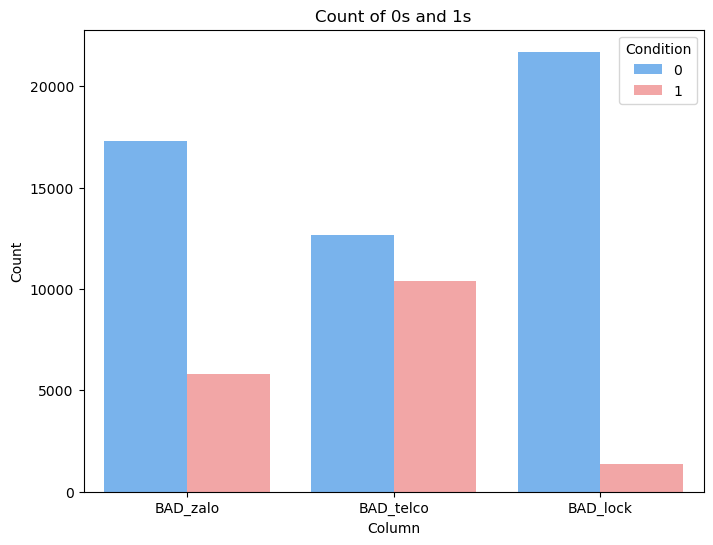

In [51]:
# Select the relevant columns
columns_to_plot = ['BAD_zalo', 'BAD_telco', 'BAD_lock']

# Count the occurrences of 0s and 1s in each column
counts = df[columns_to_plot].apply(pd.value_counts).fillna(0).astype(int)

# Reshape the counts DataFrame for plotting
counts = counts.unstack().reset_index()
counts.columns = ['Column', 'Condition', 'Count']

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Column', y='Count', hue='Condition', data=counts, palette=colors)

# Add count labels to the bars
for _, row in counts.iterrows():
    count = row['Count']

# Set labels and title
plt.xlabel('Column')
plt.ylabel('Count')
plt.title('Count of 0s and 1s')

# Display the plot
plt.show()

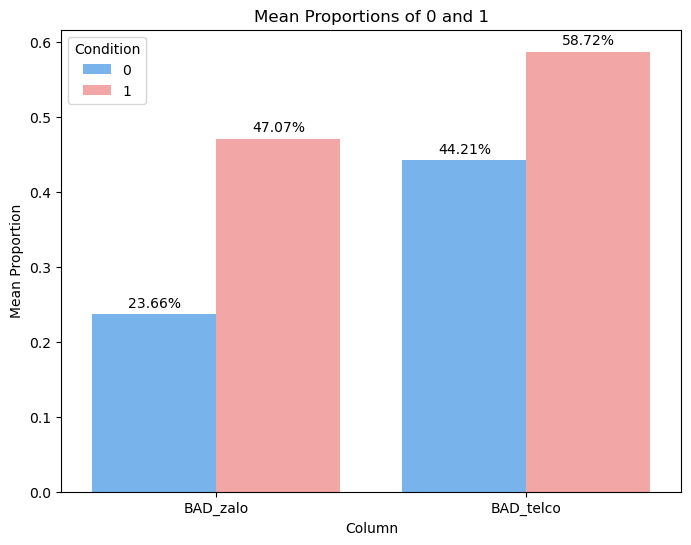

In [52]:
colors = ['#66b3ff', '#ff9999']
# Select the relevant columns
columns_to_plot = ['BAD_zalo', 'BAD_telco']

# Calculate the mean for each column grouped by 'BAD' column
means = df.groupby('BAD')[columns_to_plot].mean().transpose()

# Reshape the means DataFrame for plotting
means = means.reset_index().rename(columns={'index': 'Column'})
means = pd.melt(means, id_vars='Column', var_name='Condition', value_name='Mean')

# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Column', y='Mean', hue='Condition', data=means, palette=colors)

# Add mean percentage labels to the bars
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 0.01, f'{means["Mean"].values[i]:.2%}', ha='center')

# Set labels and title
plt.xlabel('Column')
plt.ylabel('Mean Proportion')
plt.title('Mean Proportions of 0 and 1')

# Display the plot
plt.show()


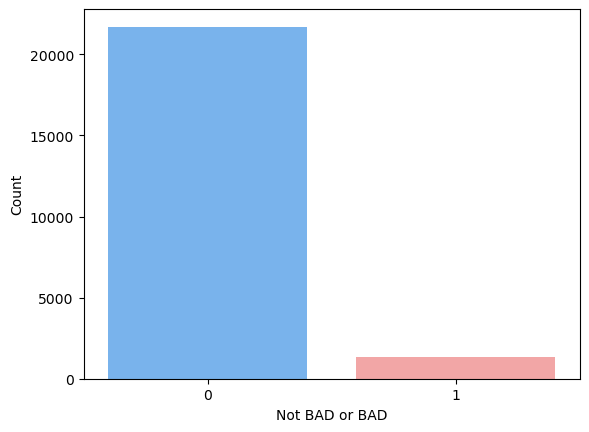

In [53]:
colors = ['#66b3ff', '#ff9999']
sns.countplot(x='BAD', data=df, palette=colors)
plt.xlabel('Not BAD or BAD')
plt.ylabel('Count')
plt.show()

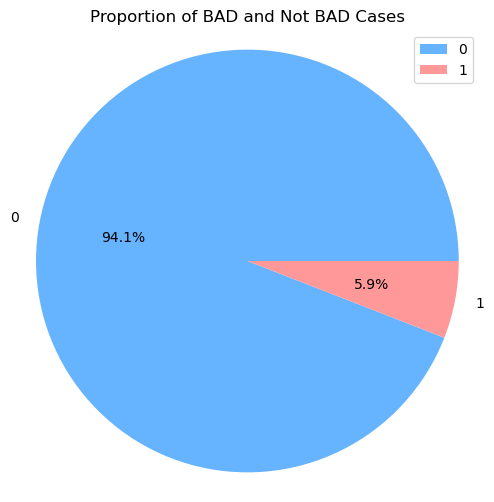

In [54]:
# Creating a copy
counts = df['BAD'].value_counts()
# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.axis('equal')
plt.title('Proportion of BAD and Not BAD Cases')
plt.legend()
plt.show()

In [55]:
loan_data = df
data = df

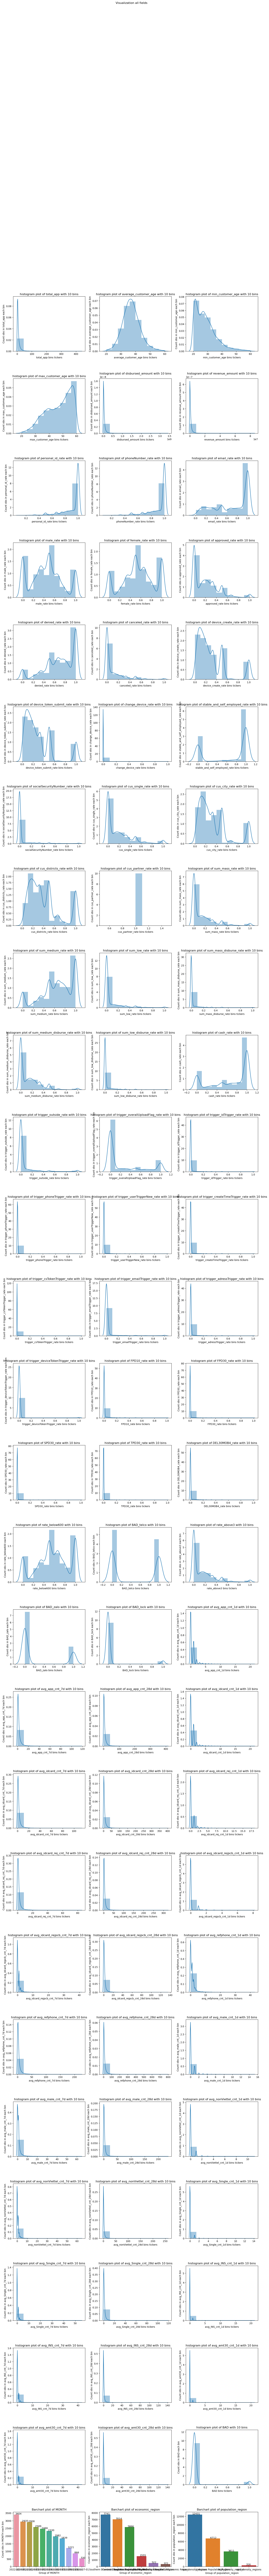

In [56]:
# Separate continuous and discrete variables
cont_vars = []
disc_vars = []
for col in data.columns:
    if data[col].dtype in ['object'] and data[col].nunique() < 15:
        disc_vars.append(col)
    elif data[col].dtype in ['float64', 'int64']:
        cont_vars.append(col)

# Histogram
def _plot_hist_subplot(x, fieldname, bins=10, use_kde=True):
    x = x.dropna()
    xlabel = '{} bins tickers'.format(fieldname)
    ylabel = 'Count obs in {} each bin'.format(fieldname)
    title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
    ax = sns.distplot(x, bins=bins, kde=use_kde)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax

# Barchart
def _plot_barchart_subplot(x, fieldname):
    xlabel = 'Group of {}'.format(fieldname)
    ylabel = 'Count obs in {} each bin'.format(fieldname)
    title = 'Barchart plot of {}'.format(fieldname)
    x = x.fillna('Missing')
    df_summary = x.value_counts(dropna=False)
    y_values = df_summary.values
    x_index = df_summary.index
    ax = sns.barplot(x=x_index, y=y_values, order=x_index)

    # Create a ring for taking the top peak coordinates of the chart and add labels through the annotate.
    labels = list(set(x))
    for label, p in zip(y_values, ax.patches):
        ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    return ax

# Determine the number of rows and columns for the grid
num_vars = len(cont_vars) + len(disc_vars)
num_rows = (num_vars - 1) // 3 + 1  # 3 columns
num_cols = min(num_vars, 3)

# Initialize the figure for the graph
fig = plt.figure(figsize=(18, 6*num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

# Create a plot for continuous variables
for i, cont_var in enumerate(cont_vars):
    ax_i = fig.add_subplot(num_rows, num_cols, i+1)
    ax_i = _plot_hist_subplot(data[cont_var], fieldname=cont_var)

# Create a plot for discrete variables
for i, disc_var in enumerate(disc_vars):
    ax_i = fig.add_subplot(num_rows, num_cols, len(cont_vars)+i+1)
    ax_i = _plot_barchart_subplot(data[disc_var], fieldname=disc_var)

fig.suptitle('Visualization all fields')
plt.show()


In [57]:
# Drop the 'BAD_lock' column
df = df.drop('BAD_lock', axis=1)

In [58]:
df.head()

MONTH vnpostUserName      vnpostProvinceName  total_app  \
1  2022-11-01       00099806  Bưu điện Tỉnh Bạc Liêu          5   
2  2022-12-01       00099806  Bưu điện Tỉnh Bạc Liêu          8   
3  2023-01-01       00099806  Bưu điện Tỉnh Bạc Liêu          1   
4  2023-02-01       00099806  Bưu điện Tỉnh Bạc Liêu          3   
5  2023-03-01       00099806  Bưu điện Tỉnh Bạc Liêu          3   

  total_app_label  average_customer_age  min_customer_age  max_customer_age  \
1          4b. =5             34.600000                29                43   
2          5.c =8             40.125000                30                58   
3           1. =1             33.000000                33                33   
4           3. =3             34.333333                33                36   
5           3. =3             35.333333                31                42   

   disbursed_amount  revenue_amount  personal_id_rate  phoneNumber_rate  \
1          50000000       1250000.0             1.000             1.000   
2         110000000       2750000.0             0.875             0.875   
3                 0             0.0             1.000             1.000   
4                 0             0.0             1.000             1.000   
5          20000000        500000.0             1.000             1.000   

   email_rate  male_rate  female_rate  approved_rate  denied_rate  \
1       1.000   1.000000     0.000000       0.200000     0.800000   
2       0.875   0.375000     0.625000       0.375000     0.500000   
3       1.000   1.000000     0.000000       0.000000     1.000000   
4       1.000   1.000000     0.000000       0.000000     1.000000   
5       1.000   0.333333     0.666667       0.333333     0.666667   

   canceled_rate  device_create_rate  device_token_submit_rate  \
1          0.000            0.200000                  0.200000   
2          0.125            0.125000                  0.125000   
3          0.000            1.000000                  1.000000   
4          0.000            0.333333                  0.333333   
5          0.000            0.333333                  0.333333   

   change_device_rate  stable_and_self_employed_rate  \
1                 0.0                       1.000000   
2                 0.0                       1.000000   
3                 0.0                       1.000000   
4                 0.0                       0.666667   
5                 0.0                       0.000000   

   socialSecurityNumber_rate  cus_single_rate  cus_city_rate  \
1                        0.0         0.200000       0.400000   
2                        0.0         0.250000       0.125000   
3                        0.0         0.000000       1.000000   
4                        0.0         0.666667       0.333333   
5                        0.0         1.000000       0.333333   

   cus_districts_rate  cus_partner_rate  sum_mass_rate  sum_medium_rate  \
1            0.800000               1.0            0.0            0.600   
2            0.375000               1.0            0.0            0.625   
3            1.000000               1.0            0.0            0.000   
4            0.666667               1.0            0.0            1.000   
5            0.666667               1.0            0.0            1.000   

   sum_low_rate  sum_mass_disburse_rate  sum_medium_disburse_rate  \
1          0.40                     0.0                  0.000000   
2          0.25                     0.0                  0.125000   
3          1.00                     0.0                  0.000000   
4          0.00                     0.0                  0.000000   
5          0.00                     0.0                  0.333333   

   sum_low_disburse_rate  cash_rate  trigger_outside_rate  \
1                   0.20       1.00                   0.2   
2                   0.25       0.75                   0.0   
3                   0.00       1.00                   0.0   
4                   0.00       1.00

## Features Correlations

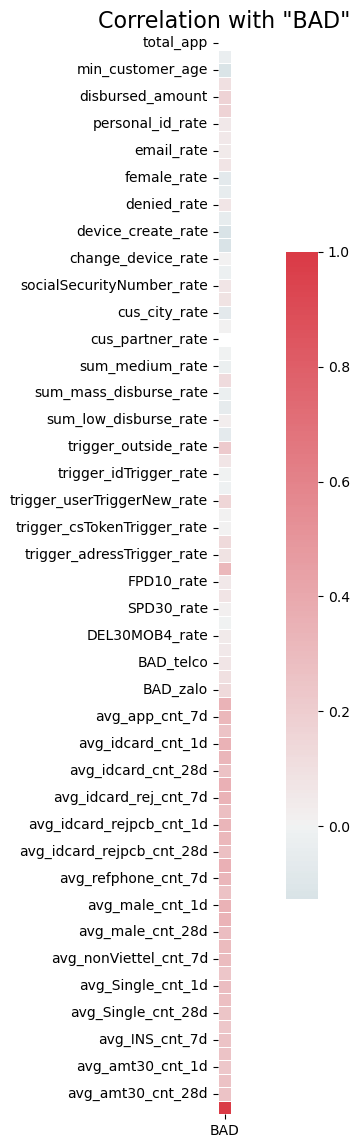

In [59]:
corr = df.corr()
corr_bad = corr['BAD']

mask = np.triu(np.ones_like(corr_bad.to_frame(), dtype=bool))

plt.figure(figsize=(14, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_bad.to_frame(), cmap=cmap, mask=mask, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.6})

plt.title('Correlation with "BAD"', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [60]:
fraudulent_data = df[df['BAD'] == 1]
non_fraudulent_data = df[df['BAD'] == 0]

In [61]:
fraudulent_stats = fraudulent_data.describe()
non_fraudulent_stats = non_fraudulent_data.describe()

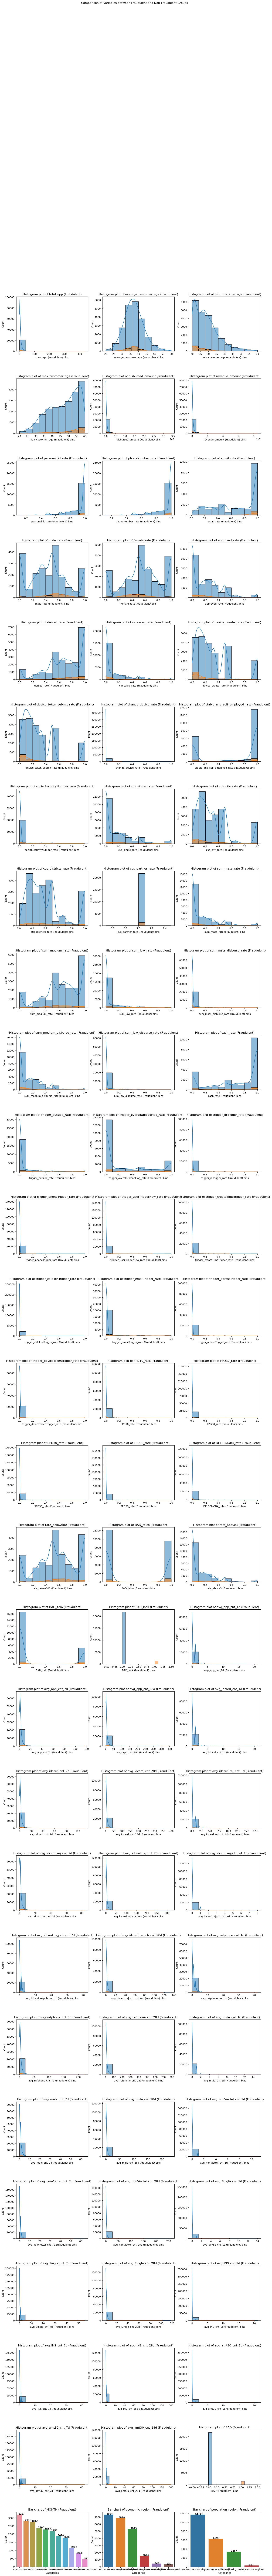

In [62]:
# Separate continuous and discrete variables
cont_vars = []
disc_vars = []
for col in data.columns:
    if data[col].dtype in ['object'] and data[col].nunique() < 15:
        disc_vars.append(col)
    elif data[col].dtype in ['float64', 'int64']:
        cont_vars.append(col)

# Histogram
def plot_hist_subplot(data, fieldname, bins=10, use_kde=True, ax=None):
    xlabel = '{} bins'.format(fieldname)
    ylabel = 'Count'
    title = 'Histogram plot of {}'.format(fieldname)
    
    sns.histplot(data, bins=bins, kde=use_kde, ax=ax)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Barchart
def plot_barchart_subplot(data, fieldname, ax=None):
    xlabel = 'Categories'
    ylabel = 'Count'
    title = 'Bar chart of {}'.format(fieldname)
    
    df_summary = data.value_counts(dropna=False)
    y_values = df_summary.values
    x_index = df_summary.index
    sns.barplot(x=x_index, y=y_values, order=x_index, ax=ax)
    
    for label, p in zip(y_values, ax.patches):
        ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

# Determine the number of rows and columns for the grid
num_vars = len(cont_vars) + len(disc_vars)
num_rows = (num_vars - 1) // 3 + 1  # 3 columns
num_cols = min(num_vars, 3)

# Initialize the figure for the graph
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 6*num_rows))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

# Create a plot for continuous variables
for i, cont_var in enumerate(cont_vars):
    ax = axes.flatten()[i]
    plot_hist_subplot(data[data['BAD'] == 0][cont_var], fieldname=cont_var + ' (Non-Fraudulent)', ax=ax)
    plot_hist_subplot(data[data['BAD'] == 1][cont_var], fieldname=cont_var + ' (Fraudulent)', ax=ax)

# Create a plot for discrete variables
for i, disc_var in enumerate(disc_vars):
    ax = axes.flatten()[len(cont_vars) + i]
    plot_barchart_subplot(data[data['BAD'] == 0][disc_var], fieldname=disc_var + ' (Non-Fraudulent)', ax=ax)
    plot_barchart_subplot(data[data['BAD'] == 1][disc_var], fieldname=disc_var + ' (Fraudulent)', ax=ax)

# Hide unused subplots
for i in range(num_vars, num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

fig.suptitle('Comparison of Variables between Fraudulent and Non-Fraudulent Groups')
plt.show()


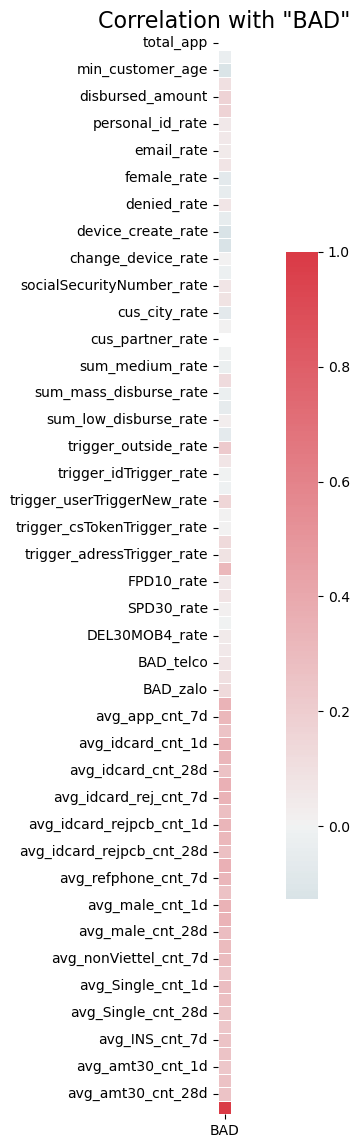

In [63]:
corr = df.corr()
corr_bad = corr['BAD']

mask = np.triu(np.ones_like(corr_bad.to_frame(), dtype=bool))

plt.figure(figsize=(14, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_bad.to_frame(), cmap=cmap, mask=mask, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.6})

plt.title('Correlation with "BAD"', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

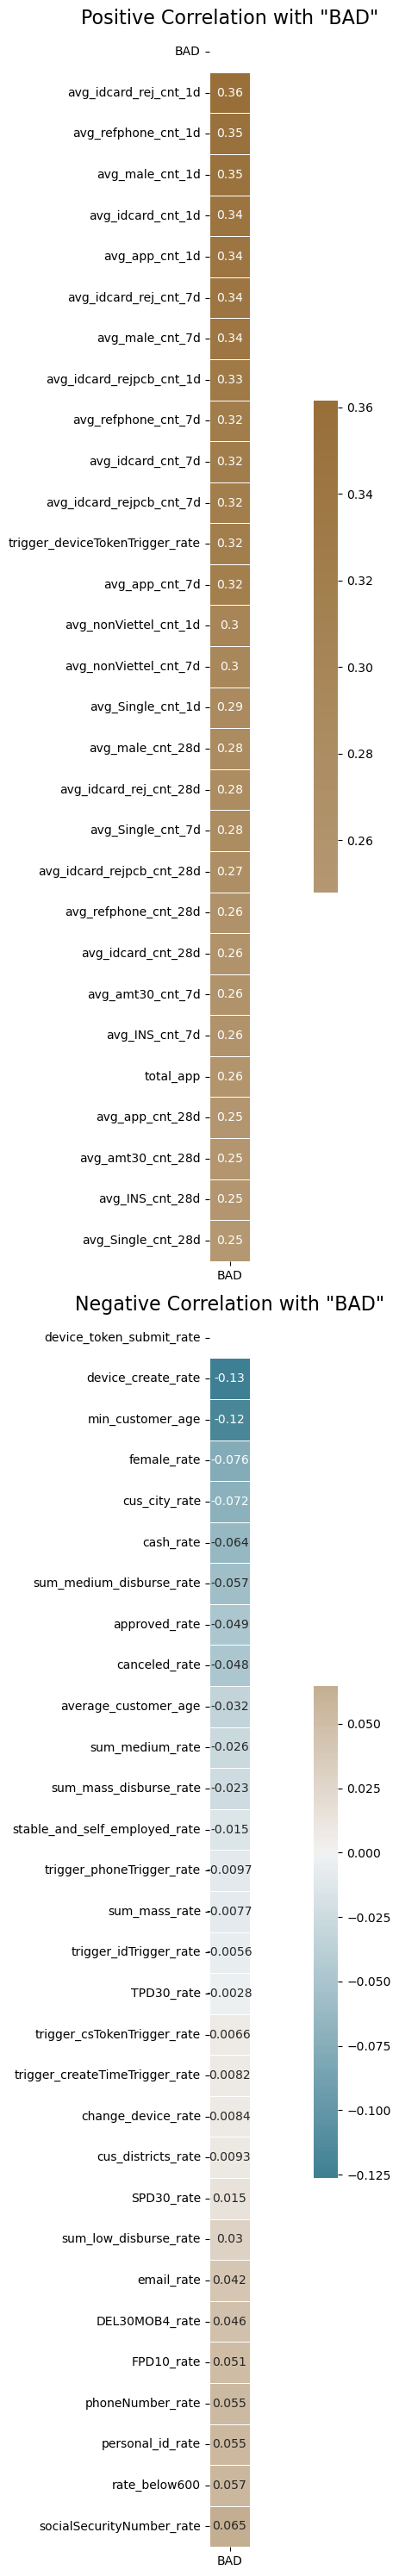

In [64]:
corr = df.corr()

# Positive correlation with target variable
pos_corr_bad = corr['BAD'].sort_values(ascending=False)[:30]
# Negative correlation with target variable
neg_corr_bad = corr['BAD'].sort_values(ascending=True)[:30]

# Create mask for each correlation
pos_mask = np.triu(np.ones_like(pos_corr_bad.to_frame(), dtype=bool))
neg_mask = np.triu(np.ones_like(neg_corr_bad.to_frame(), dtype=bool))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 30))

cmap = sns.diverging_palette(220, 50, as_cmap=True)

sns.heatmap(pos_corr_bad.to_frame(), annot=True, cmap=cmap, mask=pos_mask, center=0, square=True, linewidths=0.7, cbar_kws={"shrink": 0.4}, ax=ax1)
ax1.set_title('Positive Correlation with "BAD"', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=10)

sns.heatmap(neg_corr_bad.to_frame(), annot=True, cmap=cmap, mask=neg_mask, center=0, square=True, linewidths=0.7, cbar_kws={"shrink": 0.4}, ax=ax2)
ax2.set_title('Negative Correlation with "BAD"', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=10)
ax2.set_yticklabels(ax2.get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.show()


BAD and NON-BAD

In [65]:
# Convert the 'MONTH' column to datetime if it's not already
df['MONTH'] = pd.to_datetime(df['MONTH'])

# Split the DataFrame based on the date
before_2022_12 = df[df['MONTH'] < '2022-12']
out_of_time_sample = df[(df['MONTH'] >= '2022-12') & (df['MONTH'] <= '2023-06')]

In [66]:
# # Split Train - Test
loan_data_train = out_of_time_sample.copy()
loan_data_test = before_2022_12.copy()

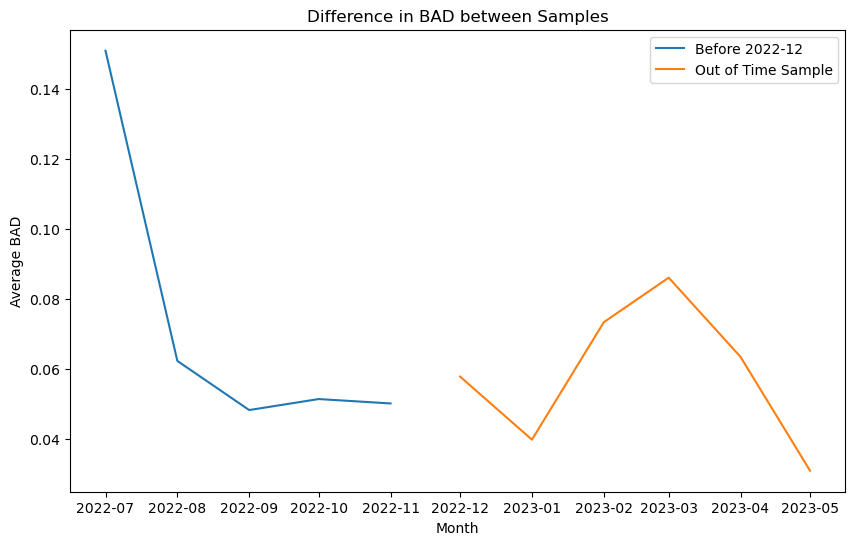

In [67]:
# Calculate the monthly average of the 'BAD' column for each sample
before_2022_12_avg = before_2022_12.groupby('MONTH')['BAD'].mean()
out_of_time_sample_avg = out_of_time_sample.groupby('MONTH')['BAD'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(before_2022_12_avg.index, before_2022_12_avg, label='Before 2022-12')
plt.plot(out_of_time_sample_avg.index, out_of_time_sample_avg, label='Out of Time Sample')
plt.xlabel('Month')
plt.ylabel('Average BAD')
plt.title('Difference in BAD between Samples')
plt.legend()
plt.show()

In [68]:
fraudulent_data = df[df['BAD'] == 1]
non_fraudulent_data = df[df['BAD'] == 0]

In [69]:
fraudulent_stats = fraudulent_data.describe()
non_fraudulent_stats = non_fraudulent_data.describe()

# Extract specific statistics for comparison
fraudulent_stats = fraudulent_stats.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
non_fraudulent_stats = non_fraudulent_stats.loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Rename the index to distinguish between fraudulent and non-fraudulent data
fraudulent_stats.rename(index=lambda x: 'fraudulent_' + x, inplace=True)
non_fraudulent_stats.rename(index=lambda x: 'non_fraudulent_' + x, inplace=True)

# Concatenate the statistics into a single dataframe for comparison
comparison_stats = pd.concat([fraudulent_stats, non_fraudulent_stats], axis=0)

# Print the comparison statistics
#print(comparison_stats)

In [70]:
# comparison_stats

# Weight of Evidence

## Function definitions

In [71]:
def woe_discrete(df_input, variable_name):
    df = df_input[[variable_name, 'BAD']]
    df = pd.concat([df.groupby(variable_name, as_index = False)['BAD'].count(),
                    df.groupby(variable_name, as_index = False)['BAD'].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [variable_name, 'n_obs', 'prop_bad']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_bad'] = df['prop_bad'] * df['n_obs']
    df['n_good'] = (1 - df['prop_bad']) * df['n_obs']
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE']).reset_index(drop = True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    if (df['IV'][0] == -np.inf) or (df['IV'][0] == np.inf):
        extreme = set(df[(df['WoE'] > -np.inf) & (df['WoE'] < np.inf)][variable_name])
        df_input_new = df_input[df_input[variable_name].isin(extreme)]
        df['IV_adjusted'] = woe_discrete(df_input_new, variable_name)['IV'][0]
    else:
        df['IV_adjusted'] = df['IV']
        
    return df

def woe_continuous_best_class_count(df_input, variable_name, class_count_bounds = [5, 6]):
    candidate_class_counts = list(range(class_count_bounds[0], class_count_bounds[1]))

    # Generate bins for each candidate class count
    candidate_bins = [pd.qcut(df_input[variable_name], q=count, duplicates='drop', retbins=True) 
                      for count in candidate_class_counts]

    # Calculate WoE and IV for each binning scheme
    IV_adjusted_list = [woe_discrete(pd.DataFrame({variable_name: bins[0], 'BAD': df_input['BAD']}), variable_name)['IV_adjusted'][0] 
                        for bins in candidate_bins]

    # Find best class count
    best_cut = candidate_class_counts[IV_adjusted_list.index(max(IV_adjusted_list))]

    return [best_cut, woe_discrete(pd.DataFrame({variable_name: candidate_bins[best_cut-class_count_bounds[0]][0], 'BAD': df_input['BAD']}), variable_name), candidate_bins[best_cut-class_count_bounds[0]][1]]

def plot_by_woe(df_WoE, rotation_of_x_axis_labels=30, figsize=(10, 5)):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    colors = ['red' if val < 0 else 'green' for val in y]  # Assign red color for negative values and green for positive values
    plt.figure(figsize=figsize)
    plt.plot(x, y, marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6)  # Set line color to blue, marker edge color to black, and marker size to 6
    plt.axhline(0, color='k', linestyle='--')  # Add a horizontal line at y=0 for reference
    var_name = df_WoE.columns[0]
    var_IV = df_WoE['IV_adjusted'][0]
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + var_name + ' (IV = ' + str(round(var_IV, 5)) + ')')
    plt.xticks(rotation=rotation_of_x_axis_labels, ha='right')
    plt.subplots_adjust(bottom=0.15)
    
    # Customize legend colors
    handles = [plt.Line2D([], [], marker='o', linestyle='--', color='k', markersize=6),
               plt.Line2D([], [], marker='o', linestyle='--', color='b', mec='black', mew=1, ms=6, markerfacecolor='none')]
    labels = ['y = 0', 'Weight of Evidence']
    plt.legend(handles, labels, loc='best')
    
    # Set custom colors for markers
    for i, (xi, yi) in enumerate(zip(x, y)):
        plt.plot(xi, yi, marker='o', color=colors[i], mec='black', mew=1, ms=6)
    
    plt.show()

## Discrete variables

In [72]:
# Object columns 
columns_obj = loan_data.select_dtypes(['object']).columns
columns_obj

Index(['MONTH', 'vnpostUserName', 'vnpostProvinceName', 'total_app_label',
       'economic_region', 'population_region'],
      dtype='object')

In [73]:
import math
discrete_cols = ['vnpostUserName', 'vnpostProvinceName', 'total_app_label',
       'economic_region', 'population_region']
df_discrete = pd.DataFrame(discrete_cols).rename(columns = {0:'DISCRETE_COL'})
df_discrete['DISTINCT'], df_discrete['IV'], df_discrete['IV_ADJUSTED'] = '', '', ''
for i in range(len(df_discrete)):
    col = df_discrete['DISCRETE_COL'][i]
    results = woe_discrete(loan_data, col)
    df_discrete['DISTINCT'][i] = len(results)
    df_discrete['IV'][i] = results['IV'][0]
    df_discrete['IV_ADJUSTED'][i] = results['IV_adjusted'][0]
    print(col, 'done!')
df_discrete = df_discrete.sort_values(['IV_ADJUSTED', 'IV', 'DISTINCT'], ascending = [False, True, True]).reset_index(drop = True)
df_discrete

vnpostUserName done!
vnpostProvinceName done!
total_app_label done!
economic_region done!
population_region done!


DISCRETE_COL DISTINCT        IV IV_ADJUSTED
0  vnpostProvinceName       63       inf    1.149759
1     total_app_label       17   0.86799     0.86799
2      vnpostUserName     5444       inf    0.454512
3     economic_region        6  0.398837    0.398837
4   population_region        4  0.030273    0.030273

In [74]:
# Filter columns based on DISTINCT and IV_ADJUSTED
selected_discrete_cols = []
for i in range(len(df_discrete)):
    if df_discrete['IV_ADJUSTED'][i] > 0.2 and df_discrete['DISTINCT'][i] < 20:
        selected_discrete_cols.append(df_discrete['DISCRETE_COL'][i])
        
    
print('Selected discrete columns:', selected_discrete_cols)

Selected discrete columns: ['total_app_label', 'economic_region']


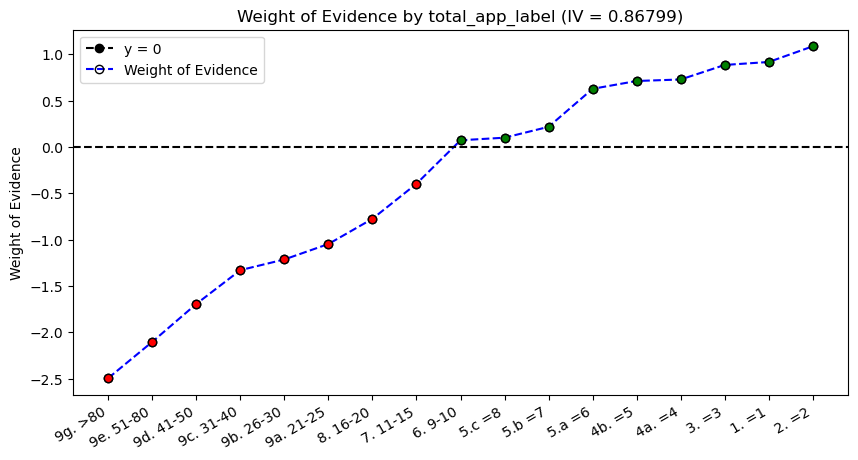

In [75]:
# Sample plot of "total_app_label"
plot_by_woe(woe_discrete(loan_data, 'total_app_label'))

In [76]:
# Sample WoE table 
woe_discrete(loan_data, 'total_app_label')

total_app_label  n_obs  prop_bad  prop_n_obs  n_bad  n_good  prop_n_bad  \
0          9g. >80    155  0.432258    0.006719   67.0    88.0    0.049120   
1        9e. 51-80    309  0.339806    0.013394  105.0   204.0    0.076979   
2        9d. 41-50    259  0.254826    0.011227   66.0   193.0    0.048387   
3        9c. 31-40    495  0.191919    0.021456   95.0   400.0    0.069648   
4        9b. 26-30    395  0.174684    0.017122   69.0   326.0    0.050587   
5        9a. 21-25    645  0.151938    0.027958   98.0   547.0    0.071848   
6         8. 16-20   1149  0.120104    0.049805  138.0  1011.0    0.101173   
7         7. 11-15   2081  0.085536    0.090204  178.0  1903.0    0.130499   
8          6. 9-10   1393  0.055276    0.060381   77.0  1316.0    0.056452   
9           5.c =8    910  0.053846    0.039445   49.0   861.0    0.035924   
10          5.b =7   1121  0.048171    0.048591   54.0  1067.0    0.039589   
11          5.a =6   1477  0.032498    0.064023   48.0  1429.0    0.035191   
12          4b. =5   1770  0.029944    0.076723   53.0  1717.0    0.038856   
13          4a. =4   2205  0.029478    0.095579   65.0  2140.0    0.047654   
14           3. =3   2924  0.025308    0.126745   74.0  2850.0    0.054252   
15           1. =1   2079  0.024531    0.090117   51.0  2028.0    0.037390   
16           2. =2   3703  0.020794    0.160511   77.0  3626.0    0.056452   

    prop_n_good       WoE       IV  IV_adjusted  
0      0.004054 -2.494523  0.86799      0.86799  
1      0.009398 -2.103008  0.86799      0.86799  
2      0.008892 -1.694132  0.86799      0.86799  
3      0.018428 -1.329580  0.86799      0.86799  
4      0.015019 -1.214376  0.86799      0.86799  
5      0.025200 -1.047686  0.86799      0.86799  
6      0.046577 -0.775726  0.86799      0.86799  
7      0.087672 -0.397764  0.86799      0.86799  
8      0.060628  0.071380  0.86799      0.86799  
9      0.039666  0.099107  0.86799      0.86799  
10     0.049157  0.216455  0.86799      0.86799  
11     0.065834  0.626362  0.86799      0.86799  
12     0.079103  0.710875  0.86799      0.86799  
13     0.098590  0.727007  0.86799      0.86799  
14     0.131300  0.883842  0.86799      0.86799  
15     0.093430  0.915813  0.86799      0.86799  
16     0.167051  1.084913  0.86799      0.86799

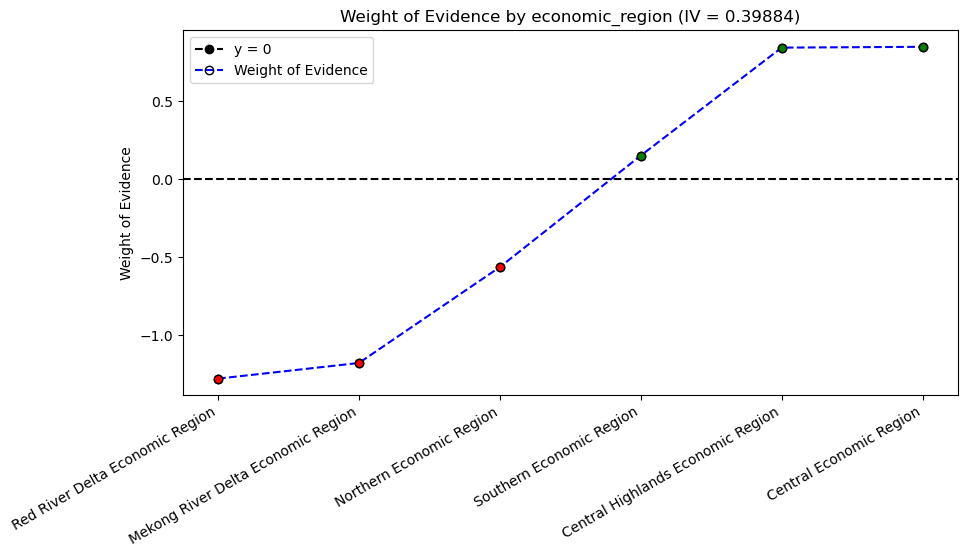

In [177]:
# Sample plot of "economic_region"
plot_by_woe(woe_discrete(loan_data, 'economic_region'))

In [178]:
# Sample WoE table 
woe_discrete(loan_data, 'economic_region')

economic_region  n_obs  prop_bad  prop_n_obs  n_bad  \
0     Red River Delta Economic Region    522  0.183908    0.022627   96.0   
1  Mekong River Delta Economic Region    372  0.169355    0.016125   63.0   
2            Northern Economic Region   5866  0.099386    0.254270  583.0   
3            Southern Economic Region   7741  0.051285    0.335544  397.0   
4   Central Highlands Economic Region   1555  0.026367    0.067404   41.0   
5             Central Economic Region   7014  0.026233    0.304031  184.0   

   n_good  prop_n_bad  prop_n_good       WoE        IV  IV_adjusted  
0   426.0    0.070381     0.019626 -1.277076  0.398837     0.398837  
1   309.0    0.046188     0.014236 -1.176961  0.398837     0.398837  
2  5283.0    0.427419     0.243389 -0.563105  0.398837     0.398837  
3  7344.0    0.291056     0.338340  0.150535  0.398837     0.398837  
4  1514.0    0.030059     0.069750  0.841771  0.398837     0.398837  
5  6830.0    0.134897     0.314660  0.846977  0.398837     0.398837

## Discretize the continuous

In [78]:
# Continuous columns
columns_num = loan_data.select_dtypes(['float', 'int']).columns

In [79]:
# Manipulation with continuous variables
pd.options.display.max_rows = None
continuous_cols = [col for col in columns_num if col not in ['BAD','cus_partner_rate']]

df_continuous = pd.DataFrame(continuous_cols).rename(columns = {0:'CONTINUOUS_COL'})
df_continuous['BEST_CUT'], df_continuous['IV'], df_continuous['IV_ADJUSTED'], df_continuous['BINS'] = '', '', '', ''
for i in range(len(df_continuous)):
    col = df_continuous['CONTINUOUS_COL'][i]
    if loan_data[col].max() < 1:
        loan_data[col] = loan_data[col] * 100
    results = woe_continuous_best_class_count(loan_data, col)
    df_continuous.at[i, 'BEST_CUT'] = results[0]
    df_continuous.at[i, 'IV'] = results[1]['IV'][0]
    df_continuous.at[i, 'IV_ADJUSTED'] = results[1]['IV_adjusted'][0]
    df_continuous.at[i, 'BINS'] = results[2]
    print(col, 'done!')

df_continuous = df_continuous.sort_values(['IV_ADJUSTED', 'IV', 'BEST_CUT'], ascending = [False, True, True]).reset_index(drop = True)
df_continuous

total_app done!
average_customer_age done!
min_customer_age done!
max_customer_age done!
disbursed_amount done!
revenue_amount done!
personal_id_rate done!
phoneNumber_rate done!
email_rate done!
male_rate done!
female_rate done!
approved_rate done!
denied_rate done!
canceled_rate done!
device_create_rate done!
device_token_submit_rate done!
change_device_rate done!
stable_and_self_employed_rate done!
socialSecurityNumber_rate done!
cus_single_rate done!
cus_city_rate done!
cus_districts_rate done!
sum_mass_rate done!
sum_medium_rate done!
sum_low_rate done!
sum_mass_disburse_rate done!
sum_medium_disburse_rate done!
sum_low_disburse_rate done!
cash_rate done!
trigger_outside_rate done!
trigger_overallUploadFlag_rate done!
trigger_idTrigger_rate done!
trigger_phoneTrigger_rate done!
trigger_userTriggerNew_rate done!
trigger_createTimeTrigger_rate done!
trigger_csTokenTrigger_rate done!
trigger_emailTrigger_rate done!
trigger_adressTrigger_rate done!
trigger_deviceTokenTrigger_rate done

CONTINUOUS_COL BEST_CUT        IV IV_ADJUSTED  \
0                   avg_male_cnt_7d        5  1.141004    1.141004   
1               avg_refphone_cnt_1d        5  1.086682    1.086682   
2             avg_idcard_rej_cnt_7d        5  1.062519    1.062519   
3               avg_refphone_cnt_7d        5  1.020719    1.020719   
4                 avg_idcard_cnt_7d        5  0.994942    0.994942   
5                    avg_app_cnt_7d        5  0.993694    0.993694   
6             avg_idcard_rej_cnt_1d        5  0.957482    0.957482   
7                 avg_idcard_cnt_1d        5  0.922402    0.922402   
8          avg_idcard_rejpcb_cnt_7d        5  0.885675    0.885675   
9                    avg_app_cnt_1d        5  0.885249    0.885249   
10                 avg_male_cnt_28d        5  0.873315    0.873315   
11           avg_idcard_rej_cnt_28d        5  0.821543    0.821543   
12                avg_Single_cnt_7d        5  0.736119    0.736119   
13                        total_app        5  0.735432    0.735432   
14             avg_refphone_cnt_28d        5  0.732375    0.732375   
15               avg_idcard_cnt_28d        5  0.728706    0.728706   
16        avg_idcard_rejpcb_cnt_28d        5  0.708216    0.708216   
17               avg_Single_cnt_28d        5  0.703672    0.703672   
18            avg_nonViettel_cnt_7d        5  0.699496    0.699496   
19                  avg_app_cnt_28d        5   0.68129     0.68129   
20                   avg_INS_cnt_7d        5  0.613532    0.613532   
21         device_token_submit_rate        5  0.612847    0.612847   
22               device_create_rate        5  0.611226    0.611226   
23           avg_nonViettel_cnt_28d        5  0.566843    0.566843   
24                avg_amt30_cnt_28d        5  0.479072    0.479072   
25                  avg_INS_cnt_28d        5  0.452156    0.452156   
26             trigger_outside_rate        5   0.43153     0.43153   
27                        male_rate        5  0.383971    0.383971   
28                      rate_above3        5  0.356547    0.356547   
29                 min_customer_age        5  0.348807    0.348807   
30                    rate_below600        5  0.343033    0.343033   
31                 disbursed_amount        5  0.325669    0.325669   
32                   revenue_amount        5  0.325669    0.325669   
33                      female_rate        5  0.311464    0.311464   
34                      denied_rate        5  0.255028    0.255028   
35                    approved_rate        5  0.227166    0.227166   
36                 max_customer_age        5  0.218073    0.218073   
37                     sum_low_rate        5  0.216343    0.216343   
38                    cus_city_rate        5  0.203242    0.203242   
39         sum_medium_disburse_rate        5  0.149531    0.149531   
40                  cus_single_rate        5  0.139432    0.139432   
41             average_customer_age        5   0.13911     0.13911   
42                 personal_id_rate        5  0.117901    0.117901   
43                 phoneNumber_rate        5  0.113023    0.113023   
44                    canceled_rate        5  0.103687    0.103687   
45   trigger_overallUploadFlag_rate        5  0.082398    0.082398   
46                       email_rate        5  0.079013    0.079013   
47                        cash_rate        5  0.051303    0.051303   
48                  sum_medium_rate        5  0.042947    0.042947   
49               cus_districts_rate        5  0.025566    0.025566   
50                    sum_mass_rate        5  0.022782    0.022782   
51    stable_and_self_employed_rate        5   0.00906     0.00906   
52               change_device_rate        5       0.0         0.0   
53        socialSecurityNumber_rate        5       0.0         0.0   
54           sum_mass_disburse_rate        5       0.0         0.0   
55            sum_low_disburse_rate        5       0.0         0.0   
56           trigger_idTrigger_

trigger_outside_rate binned!
male_rate binned!
rate_above3 binned!
min_customer_age binned!
rate_below600 binned!
disbursed_amount binned!
revenue_amount binned!
female_rate binned!


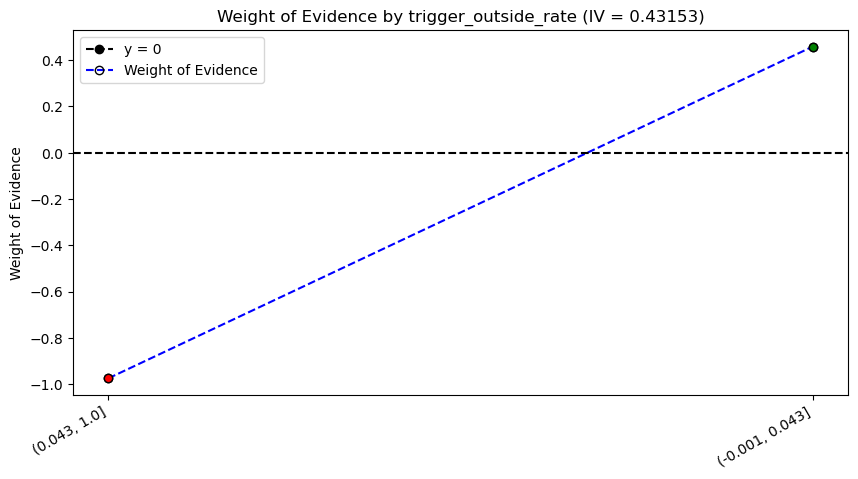

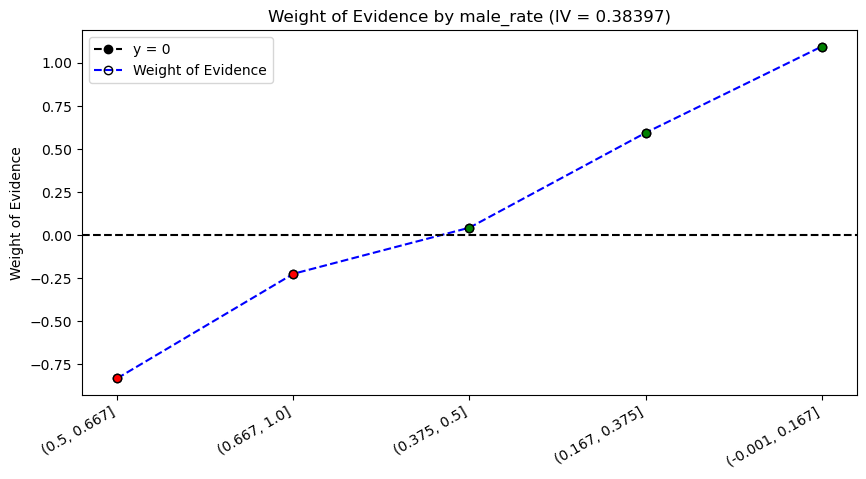

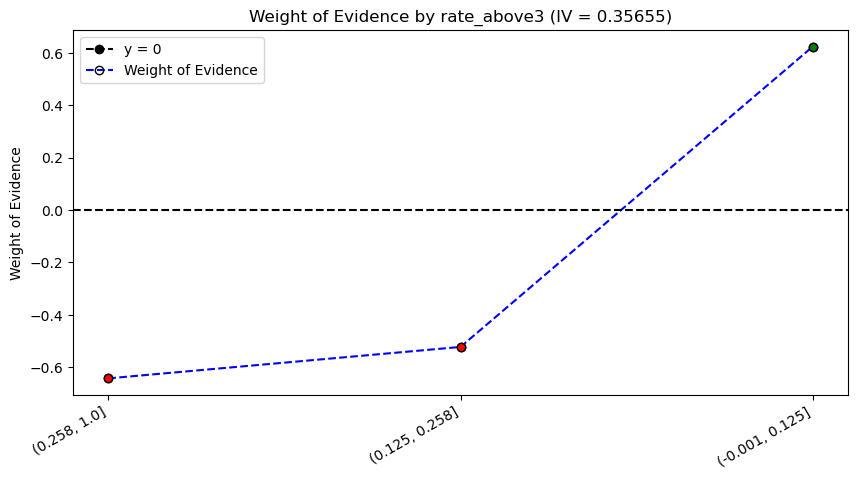

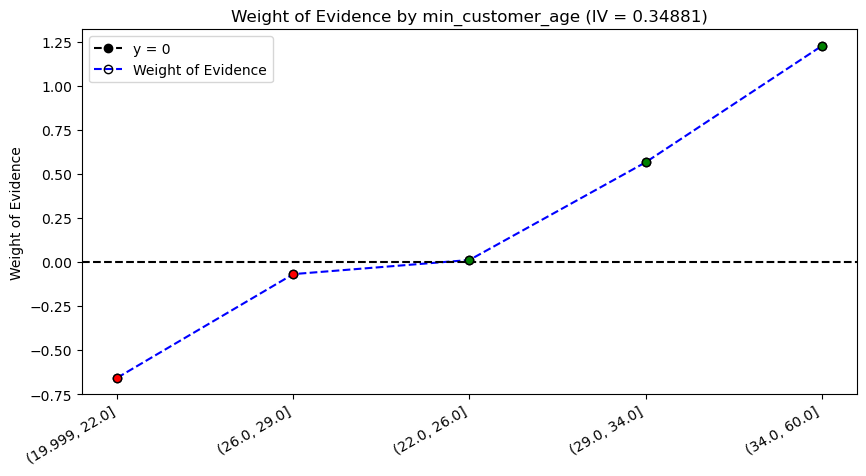

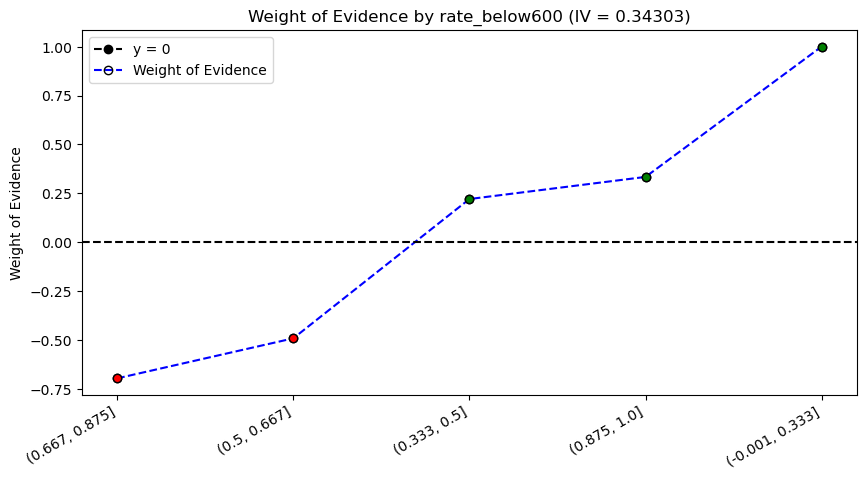

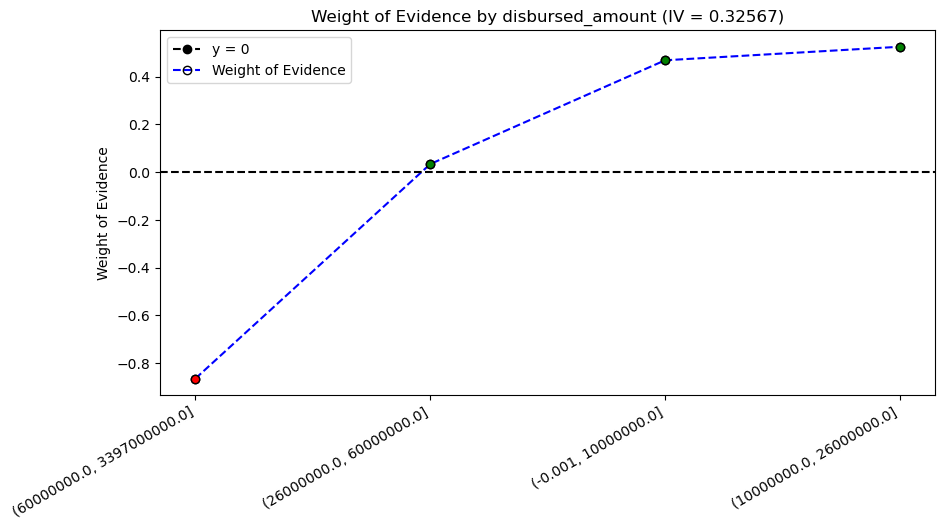

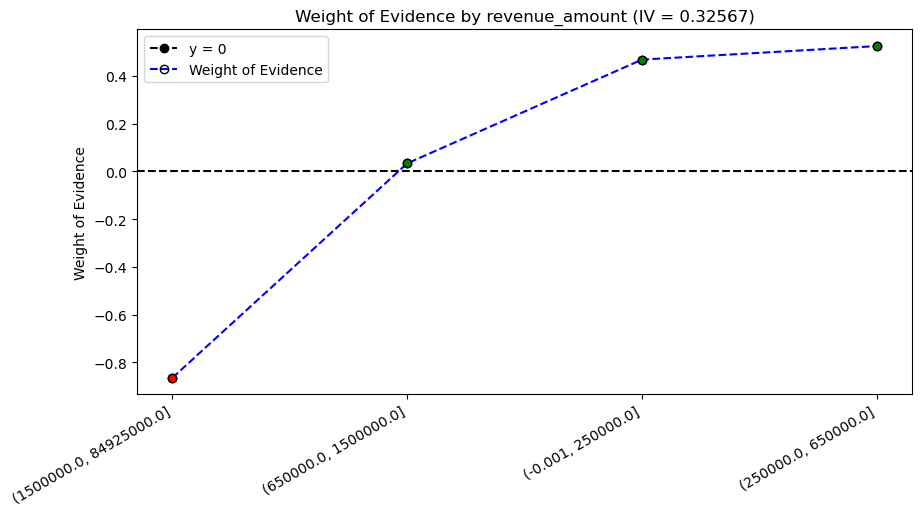

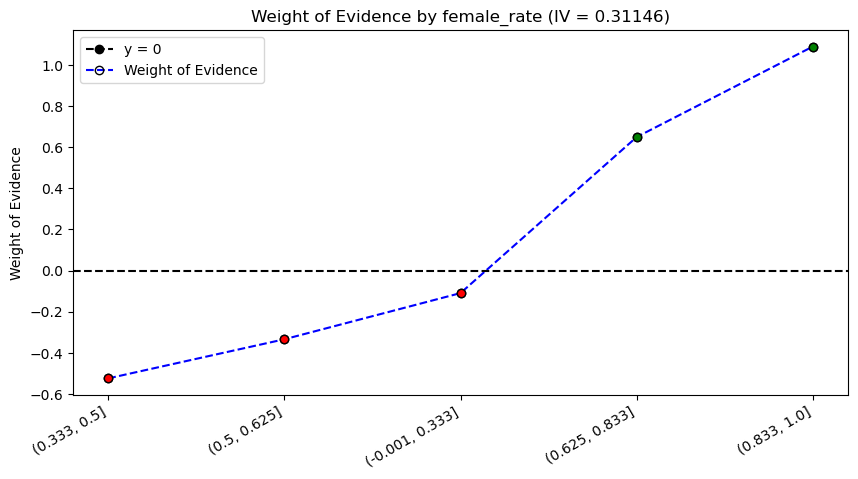

In [80]:
df_continuous_IV_gt_02 = df_continuous[(df_continuous['IV_ADJUSTED'] > 0.3) & (df_continuous['IV_ADJUSTED'] < 0.45)]

for i in range(len(df_continuous_IV_gt_02)):
    col = df_continuous_IV_gt_02.iloc[i]['CONTINUOUS_COL']
    bins = df_continuous_IV_gt_02.iloc[i]['BINS']
    loan_data[col + '_bin'] = pd.cut(loan_data[col], bins)
    print(col, 'binned!')

for col in df_continuous_IV_gt_02['CONTINUOUS_COL']:
    results = woe_continuous_best_class_count(loan_data, col)
    woe_results = results[1]
    plot_by_woe(woe_results)

In [81]:
selected_continuous_cols = df_continuous_IV_gt_02['CONTINUOUS_COL'].tolist()
selected_continuous_cols = [x + '_bin' for x in selected_continuous_cols]

# Model Estimations

## Find strong features

In [82]:
# # Summary columns selected
# selected_cols = list(set(selected_discrete_cols + selected_continuous_cols))

# # Remove any duplicate columns from selected_cols
# selected_cols = list(set(selected_cols))

# df = pd.concat([loan_data['MONTH'], loan_data[selected_cols], loan_data['BAD']], axis=1)

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, chi2

df = loan_data.copy()

# Drop the unnecessary columns
df = df.drop(['vnpostUserName', 'vnpostProvinceName'], axis=1)
df['total_app_label'] = df['total_app_label'].astype(str)
bin_vars = [column for column in df.columns if column.endswith('_bin')]
df[bin_vars] = df[bin_vars].astype(str)

# Define the numeric and categorical columns for preprocessing
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']

# Define the preprocessing steps for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_cols),
    ('categorical', categorical_transformer, categorical_cols)
])

# Define the feature selection methods
selection_methods = [
    ('Univariate Selection', SelectKBest(score_func=f_classif, k=5)),
    # ('L1 Regularization', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))),
    # ('Recursive Feature Elimination', RFE(estimator=RandomForestClassifier(), n_features_to_select=5)),
    ('Tree-Based Methods', SelectFromModel(RandomForestClassifier(), threshold='median')),
    # ('Recursive Feature Addition', RFE(estimator=RandomForestClassifier(), step=1)),
    # ('Embedded Methods', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear'))),
    # ('Correlation', SelectKBest(score_func=chi2, k=5)),
]

# Define dictionaries to store the selected features from each method
univariate_features = {}
l1_regularization_features = {}
rfe_features = {}
tree_based_features = {}
recursive_addition_features = {}
embedded_features = {}
correlation_features = {}

# Apply preprocessing and feature selection
for name, selector in selection_methods:
    # Create a pipeline with preprocessing and feature selection
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('selector', selector)
    ])

    # Fit the pipeline and transform the data
    X_selected = pipeline.fit_transform(df[numeric_cols + categorical_cols], df['BAD'])

    # Get the selected features
    if name in ['Univariate Selection', 'Correlation']:
        selected_indices = selector.get_support(indices=True)
        selected_features = [numeric_cols[i] for i in selected_indices]
        if name == 'Correlation':
            selected_features = [numeric_cols[i] for i in selected_indices if i != len(numeric_cols) - 1]
        if name == 'Univariate Selection':
            univariate_features = selected_features
        else:
            correlation_features = selected_features
    else:
        selected_features = [col for col, mask in zip(categorical_cols, selector.get_support()) if mask]
        if name == 'L1 Regularization':
            l1_regularization_features = selected_features
        elif name == 'Recursive Feature Elimination':
            rfe_features = selected_features
        elif name == 'Tree-Based Methods':
            tree_based_features = selected_features
        elif name == 'Recursive Feature Addition':
            recursive_addition_features = selected_features
        elif name == 'Embedded Methods':
            embedded_features = selected_features
    
    # Print the selected features
    print(f'{name} selected features: {selected_features}')


Univariate Selection selected features: ['avg_app_cnt_1d', 'avg_idcard_cnt_1d', 'avg_idcard_rej_cnt_1d', 'avg_refphone_cnt_1d', 'avg_male_cnt_1d']
Tree-Based Methods selected features: ['MONTH', 'total_app_label', 'economic_region', 'population_region', 'trigger_outside_rate_bin', 'male_rate_bin', 'rate_above3_bin', 'min_customer_age_bin', 'rate_below600_bin', 'disbursed_amount_bin', 'revenue_amount_bin', 'female_rate_bin']


## Encoded data

In [85]:
# Summary columns selected
# selected_cols = list(set(selected_discrete_cols + selected_continuous_cols + univariate_features))
selected_cols = list(set(selected_discrete_cols + selected_continuous_cols))
# Remove any duplicate columns from selected_cols
selected_cols = list(set(selected_cols))
df = loan_data.copy()

# Convert data to string
df[selected_cols] = df[selected_cols].astype(str)

# Define the label encoder
label_encoder = LabelEncoder()

# Define the ordinal encoder
ordinal_encoder = OrdinalEncoder()

# Define dictionary to store mappings
encoder_dict = {}

# Apply ordinal encoding to variables ending with "_bin"
bin_vars = [column for column in df.columns if column.endswith('_bin')]
for column in bin_vars:
    df[column] = df[column].astype(str)  # Convert to string
    df[column] = ordinal_encoder.fit_transform(df[column].values.reshape(-1, 1))  # Apply ordinal encoding
    encoder_dict[column] = dict(zip(ordinal_encoder.categories_[0], range(len(ordinal_encoder.categories_[0]))))

# Apply label encoding to other variables (except 'BAD')
label_vars = [column for column in df.columns if column not in bin_vars and column != 'BAD']
label_vars.remove('vnpostUserName')
label_vars.remove('MONTH')
label_vars.remove('vnpostProvinceName')
for column in label_vars:
    df[column] = label_encoder.fit_transform(df[column])
    encoder_dict[column] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Define the pipeline
categorical_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder())
])

numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Create the column transformer
preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, selected_discrete_cols),
    ('numerical', numerical_pipeline, selected_continuous_cols)
])

# Fit and transform the data
encoded_data = preprocessor.fit_transform(df)

# Convert the encoded array back to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=selected_discrete_cols + selected_continuous_cols)

# Reset the index of the loan_data DataFrame
loan_data.reset_index(drop=True, inplace=True)

# Add the 'BAD' column from the original DataFrame to the encoded DataFrame
encoded_df['BAD'] = loan_data['BAD']

# Add back the 'MONTH' column to the DataFrame
encoded_df['MONTH'] = df['MONTH']
# Convert 'MONTH' to integer
encoded_df['MONTH'] = pd.to_datetime(encoded_df['MONTH']).dt.month


# Survival Analysis

In [86]:
# from lifelines import CoxPHFitter, KaplanMeierFitter

# # Fit the model
# cph = CoxPHFitter(penalizer=0.1)
# cph.fit(encoded_df, 'MONTH', event_col='BAD')

# # Generate the summary DataFrame
# summary = cph.summary

# # Filter the DataFrame for rows with p < 0.05
# significant_summary = summary[summary['p'] < 0.05]

# # Apply conditional formatting to the coefficients
# significant_summary.style.applymap(lambda x: 'background-color : red' if x<0 else '', subset=['coef'])


In [87]:
# # Create an empty DataFrame to store the feature mappings
# mapping_df = pd.DataFrame(columns=['Feature', 'Encoded_Values'])

# # Iterate over the columns where ordinal encoding was applied
# for column, mapping in encoder_dict.items():
#     unique_values = list(mapping.keys())
#     encoded_values = list(mapping.values())
#     feature_mapping = pd.DataFrame({'Feature': column, 'Encoded_Values': encoded_values}, index=unique_values)
#     mapping_df = pd.concat([mapping_df, feature_mapping])

# # Sort the DataFrame by the encoded values
# mapping_df.sort_values(by=['Encoded_Values'], inplace=True)

# # Reset the index of the DataFrame
# mapping_df.reset_index(inplace=True)

# # Display the mapping DataFrame
# mapping_df.head(10)

In [88]:
# # Create KaplanMeierFitter object
# kmf = KaplanMeierFitter()

# # Fit the model
# kmf.fit(encoded_df['MONTH'], event_observed=encoded_df['BAD'])

# # Plot the survival curve
# fig, ax = plt.subplots()
# kmf.plot(ax=ax)

# # Add table with statistics
# add_at_risk_counts(kmf, ax=ax)

# # Customize plot labels and title
# plt.xlabel('MONTH')
# plt.ylabel('Survival Probability')
# plt.title('Kaplan-Meier Survival Curve')

# # Perform the log-rank test
# groups = encoded_df['BAD']
# observed_times = encoded_df['MONTH']
# results = logrank_test(observed_times[groups == 0], observed_times[groups == 1], event_observed_A=groups[groups == 0], event_observed_B=groups[groups == 1])
# p_value = results.p_value

# # Show p-value in the plot
# plt.text(0.5, 0.1, f'p-value: {p_value:.4f}', transform=ax.transAxes)

# plt.show()

In [89]:
# results

In [90]:
# # Kaplan Meier Fitter
# kmf = KaplanMeierFitter()

# # Loop through each variable
# for var in encoded_df.columns:
#     if var not in ['BAD', 'MONTH']:  # Exclude 'BAD' and 'MONTH' columns
#         plt.figure(figsize=(10, 5))
        
#         # Loop through each level of the variable
#         for level in encoded_df[var].unique():
#             kmf.fit(encoded_df.loc[encoded_df[var]==level, 'MONTH'], 
#                     event_observed=encoded_df.loc[encoded_df[var]==level, 'BAD'], 
#                     label=str({k: v for k, v in encoder_dict[var].items() if v == level}))
#             ax = kmf.plot()

#         plt.title(f"Survival curves for variable {var}")
#         plt.show()


# Model

## Split 2 samples 

In [91]:
df = encoded_df
# Convert the 'MONTH' column to datetime if it's not already
df['MONTH'] = pd.to_datetime(loan_data['MONTH'])

# Split the DataFrame based on the date
before_2022_12 = df[df['MONTH'] < '2022-12']
out_of_time_sample = df[(df['MONTH'] >= '2022-12') & (df['MONTH'] <= '2023-06')]

In [92]:
before_2022_12 = before_2022_12.drop('MONTH', axis=1)
out_of_time_sample = out_of_time_sample.drop('MONTH', axis=1)
df = pd.concat([before_2022_12, out_of_time_sample], ignore_index=True)

In [93]:
# Define the list of all mappings
mappings = []

# Go through the dictionary
for column, mapping in encoder_dict.items():
    for category, encoded_value in mapping.items():
        # Add each mapping to the list
        mappings.append({
            'Category Name': column,
            'Feature': category,
            'Encoded Value': encoded_value
        })

# Create a DataFrame from the list of mappings
appendix_df = pd.DataFrame(mappings)

# Display the DataFrame
# appendix_df


In [94]:
# # Convert DataFrame to Excel
# excel_file = r'C:\Users\lekho\OneDrive - VietNam National University - HCM INTERNATIONAL UNIVERSITY\Fraud Dectection Folder\User Ver Month\appendix_df.xlsx'
# appendix_df.to_excel(excel_file, index=False)  # Save DataFrame to Excel file without index

# print(f"Loan data saved to {excel_file}")

In [95]:
X = df.drop('BAD', axis=1)
y = df['BAD']

In [96]:
print('No Frauds', round(before_2022_12['BAD'].value_counts()[0]/len(before_2022_12) * 100,2), '% of the dataset')
print('Frauds', round(before_2022_12['BAD'].value_counts()[1]/len(before_2022_12) * 100,2), '% of the dataset')

# Splitting Features and Labels for training and testing data
X_train = before_2022_12.drop('BAD', axis=1)
y_train = before_2022_12['BAD']

X_test = out_of_time_sample.drop('BAD', axis=1)
y_test = out_of_time_sample['BAD']

# Turn into an array
original_Xtrain = X_train.values
original_Xtest = X_test.values
original_ytrain = y_train.values
original_ytest = y_test.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 94.13 % of the dataset
Frauds 5.87 % of the dataset
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.94125483 0.05874517]
[0.94069267 0.05930733]


In [97]:
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 2.6e+02 s
PCA took 0.14 s
Truncated SVD took 0.073 s


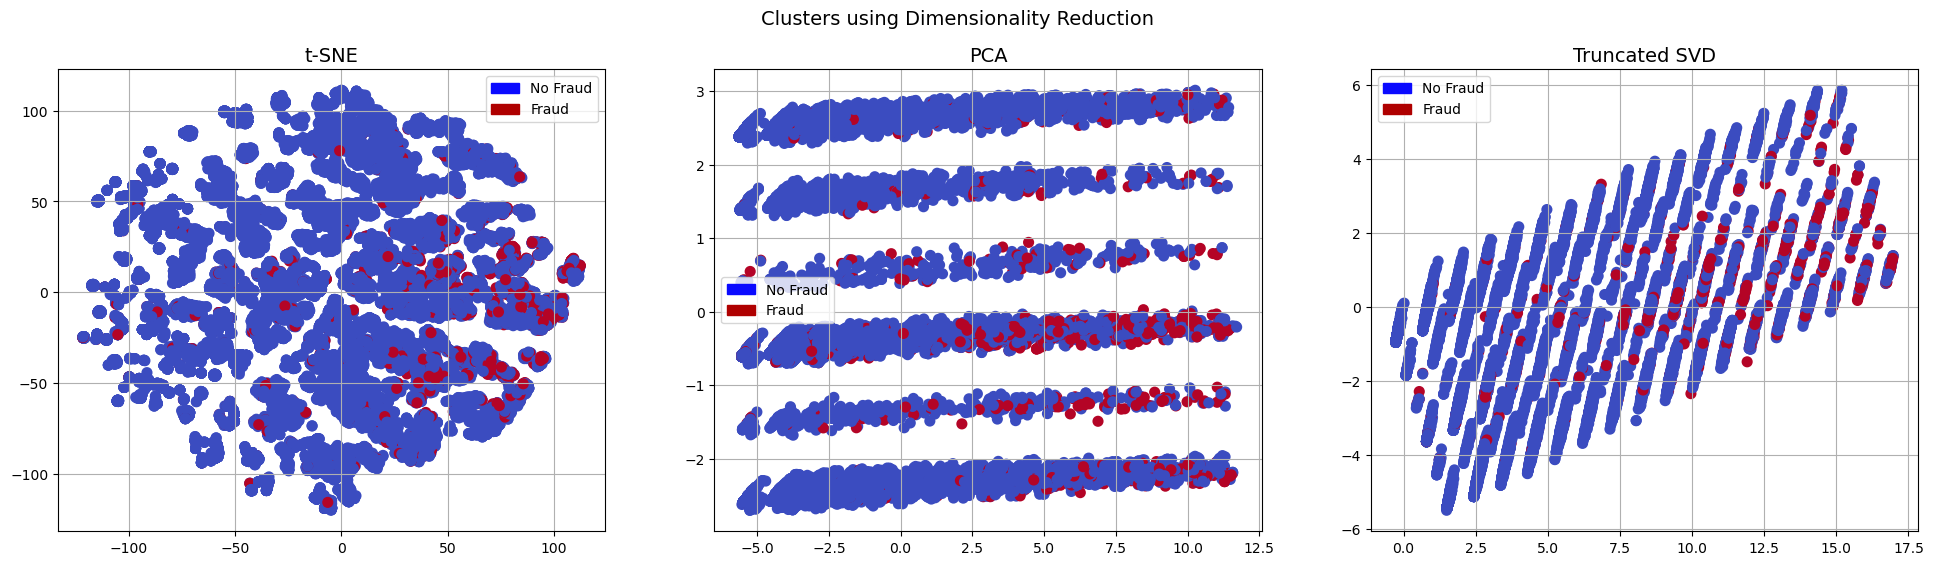

In [98]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='coolwarm', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=y, cmap='coolwarm', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=y, cmap='coolwarm', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [99]:
# Let's implement simple classifiers

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBoostClassifier": XGBClassifier(),
    "BaggingClassifier": BaggingClassifier()
}

In [100]:
# Wow our scores are getting even high scores even when applying cross validation.
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 90.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 93.0 % accuracy score
Classifiers:  BaggingClassifier Has a training score of 93.0 % accuracy score


In [101]:
# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
print('Best Estimator for Logistic Regression:', log_reg)

# K-Nearest Neighbors
knears_params = {"n_neighbors": list(range(2, 5, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_
print('Best Estimator for KNN:', knears_neighbors)

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_
print('Best Estimator for SVC:', svc)


# Decision Tree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 4, 1)), 
               "min_samples_leaf": list(range(5, 7, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_
print('Best Estimator for Decision Tree:', tree_clf)

# Random Forest Classifier
rf_params = {"n_estimators": [100, 300, 500], "max_depth": [None, 5, 10], 
             "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_train, y_train)
rf_clf = grid_rf.best_estimator_
print('Best Estimator for Random Forest:', rf_clf)

# XGBoost Classifier
xgb_params = {"learning_rate": [0.1, 0.01, 0.001], "max_depth": [3, 5, 10],
              "min_child_weight": [1, 3, 5]}
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params)
grid_xgb.fit(X_train, y_train)
xgb_clf = grid_xgb.best_estimator_
print('Best Estimator for XGBoost:', xgb_clf)


Best Estimator for Logistic Regression: LogisticRegression(C=0.001)
Best Estimator for KNN: KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2)
Best Estimator for SVC: SVC(C=0.5)
Best Estimator for Decision Tree: DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)
Best Estimator for Random Forest: RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=300)
Best Estimator for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, mis

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

classifiers = [
    ("Logistic Regression", log_reg),
    ("K-Nearest Neighbors", knears_neighbors),
    ("Support Vector Classifier", svc),
    ("Decision Tree Classifier", tree_clf),
    ("Random Forest Classifier", rf_clf),
    ("XGBoost Classifier", xgb_clf)
]

for classifier_name, classifier in classifiers:
    scores = cross_val_score(classifier, X_train, y_train, cv=5)
    accuracy = round(scores.mean() * 100, 2)
    precision = round(precision_score(y_train, classifier.predict(X_train)) * 100, 2)
    recall = round(recall_score(y_train, classifier.predict(X_train)) * 100, 2)
    
    print(classifier_name + ":")
    print("  Accuracy:", str(accuracy) + "%")
    print("  Precision:", str(precision) + "%")
    print("  Recall:", str(recall) + "%")


Logistic Regression:
  Accuracy: 94.13%
  Precision: 0.0%
  Recall: 0.0%
K-Nearest Neighbors:
  Accuracy: 93.86%
  Precision: 100.0%
  Recall: 18.37%
Support Vector Classifier:
  Accuracy: 94.13%
  Precision: 0.0%
  Recall: 0.0%
Decision Tree Classifier:
  Accuracy: 94.13%
  Precision: 0.0%
  Recall: 0.0%
Random Forest Classifier:
  Accuracy: 94.17%
  Precision: 90.32%
  Recall: 19.05%
XGBoost Classifier:
  Accuracy: 94.18%
  Precision: 60.0%
  Recall: 8.16%


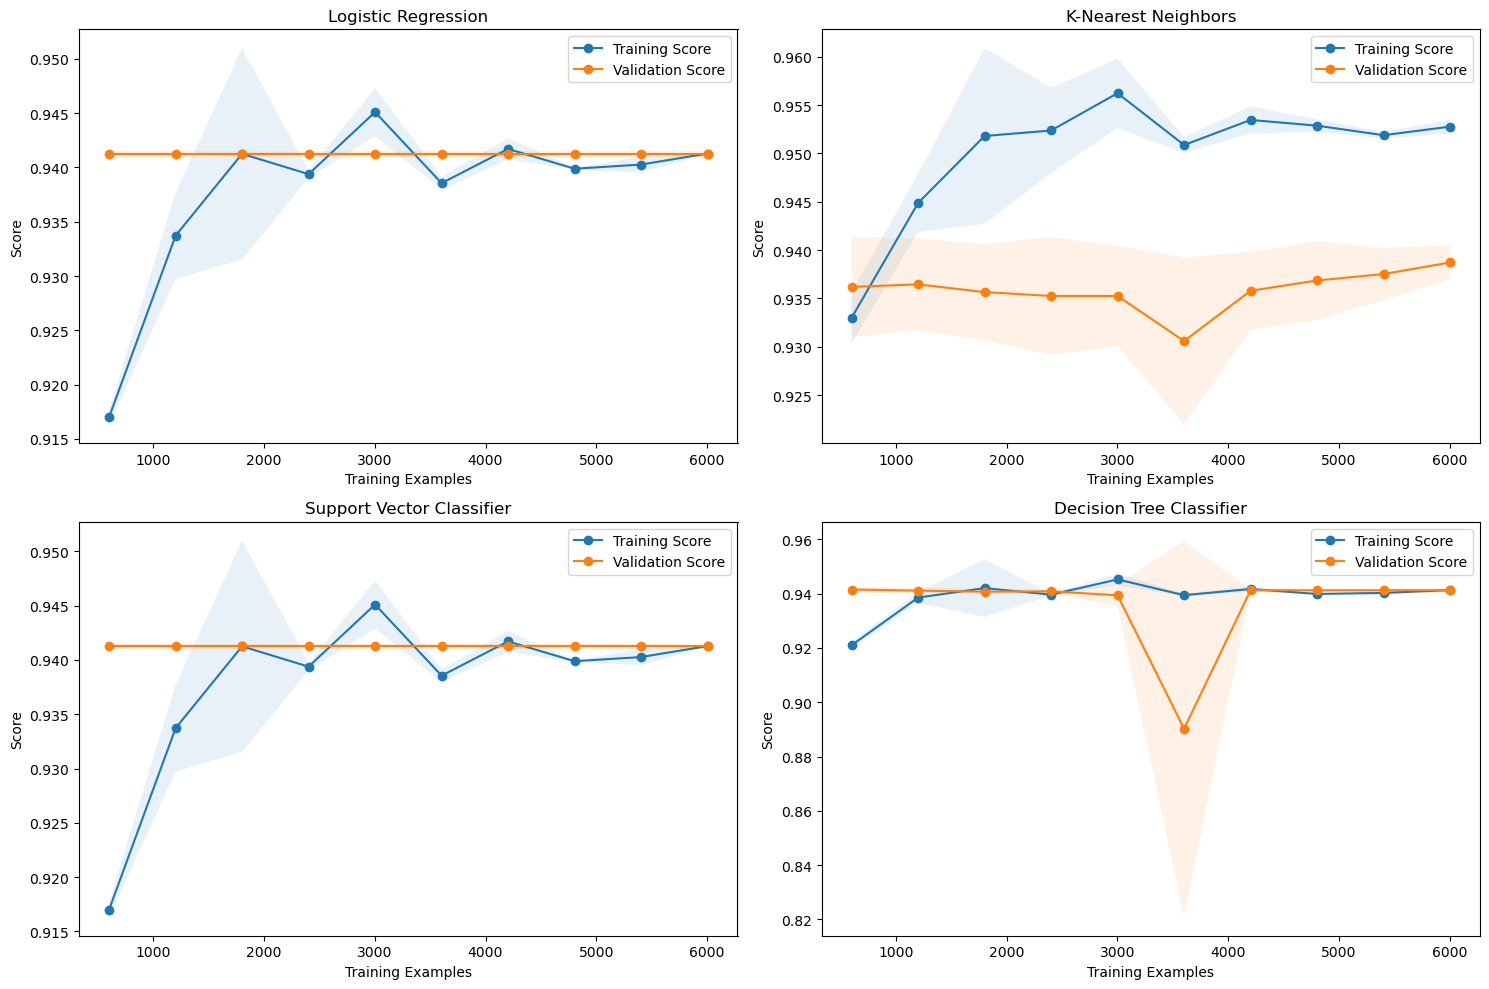

In [103]:
from sklearn.model_selection import learning_curve

# Define the classifiers
classifiers = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knears_neighbors,
    'Support Vector Classifier': svc,
    'Decision Tree Classifier': tree_clf
}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (name, clf) in enumerate(classifiers.items()):
    # Compute the learning curve
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    axs[i].plot(train_sizes, train_scores_mean, label='Training Score', marker='o')
    axs[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    axs[i].plot(train_sizes, test_scores_mean, label='Validation Score', marker='o')
    axs[i].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

    # Set the plot labels and title
    axs[i].set_title(name)
    axs[i].set_xlabel('Training Examples')
    axs[i].set_ylabel('Score')
    axs[i].legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()

In [104]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [105]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.7571340641172026
KNears Neighbors:  0.5357906630904083
Support Vector Classifier:  0.6241125943725919
Decision Tree Classifier:  0.5


In the context of your classification models, the Logistic Regression model achieved the highest AUC score of 0.794, indicating relatively good performance in terms of differentiating between positive and negative samples. The other models have lower AUC scores, suggesting they might be less effective in classification tasks compared to Logistic Regression.

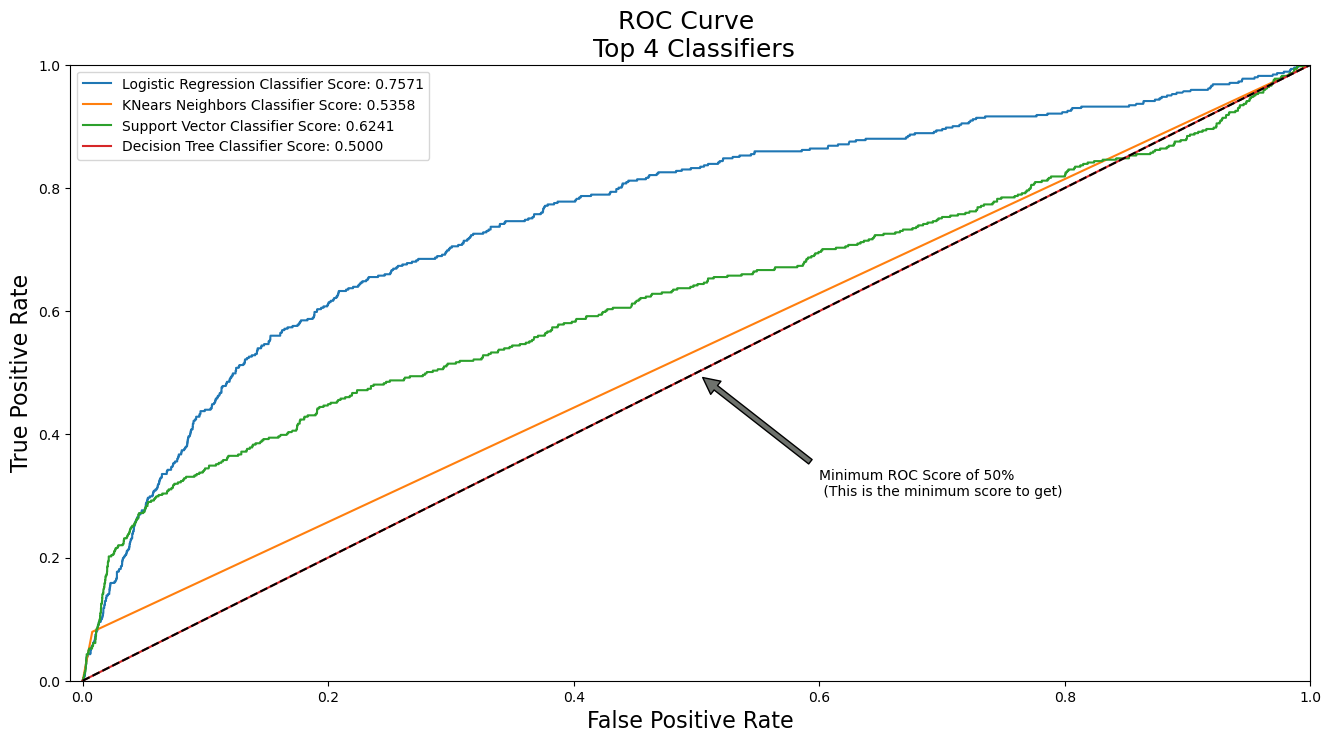

In [106]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

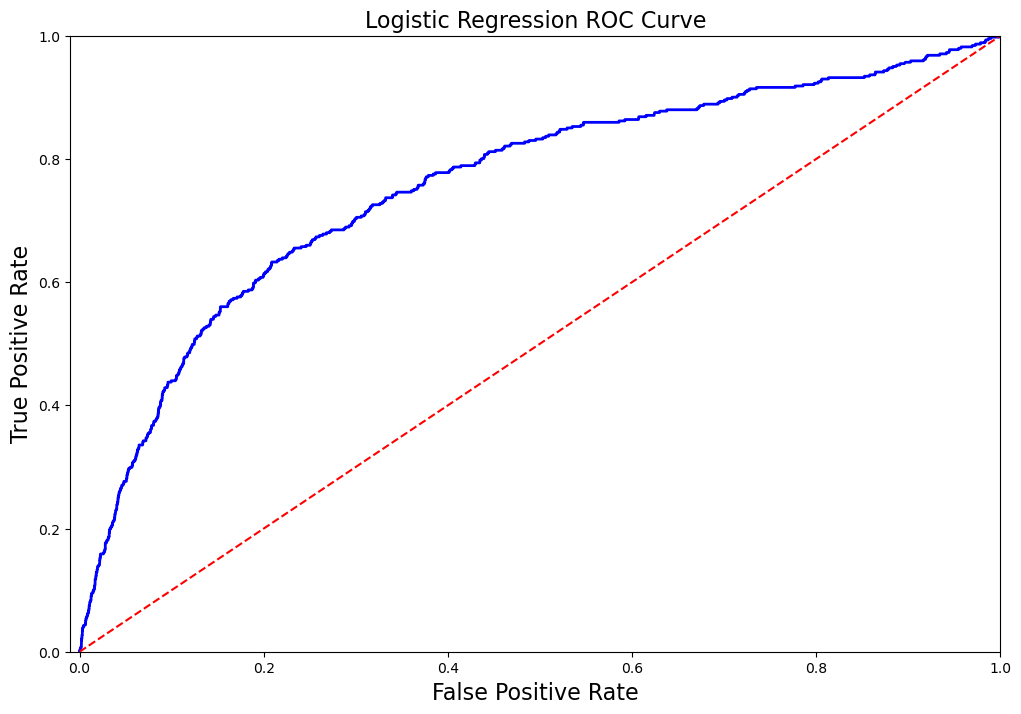

In [107]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

## Random Undersample

In [108]:
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
from sklearn.metrics import precision_score,recall_score,f1_score

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# log_reg = LogisticRegression()  # Initialize a Logistic Regression model
undersample_X, undersample_y = rus.fit_resample(X_train, y_train)
# undersample_X, undersample_y = X_train, y_train  # Assuming undersample data comes from your train data

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

undersample_X = undersample_X.values
undersample_y = undersample_y.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
nearmiss = NearMiss()

# Cross Validating the right way
for train, test in sss.split(undersample_X, undersample_y):
    undersample_pipeline = imbalanced_make_pipeline(nearmiss, log_reg) # NearMiss happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    undersample_prediction = undersample_model.predict(undersample_X[test])
    
    undersample_accuracy.append(undersample_pipeline.score(undersample_X[test], undersample_y[test]))
    undersample_precision.append(precision_score(undersample_y[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_y[test], undersample_prediction))

X_nearmiss, y_nearmiss = nearmiss.fit_resample(undersample_X, undersample_y)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))

NearMiss Label Distribution: Counter({0: 441, 1: 441})


In [109]:
classifiers = [
    ("Logistic Regression", log_reg),
    ("K-Nearest Neighbors", knears_neighbors),
    ("Support Vector Classifier", svc),
    ("Decision Tree Classifier", tree_clf),
    ("Random Forest Classifier", rf_clf),
    ("XGBoost Classifier", xgb_clf)
]

In [110]:
for classifier_name, classifier in classifiers:
    classifier.fit(X_nearmiss, y_nearmiss)
    training_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=5, scoring='accuracy')
    precision_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=5, scoring='precision')
    recall_scores = cross_val_score(classifier, X_nearmiss, y_nearmiss, cv=5, scoring='recall')
    
    print(f"Classifier: {classifier_name}")
    print(f"  Accuracy: {round(training_scores.mean() * 100, 2)}%")
    print(f"  Precision: {round(precision_scores.mean() * 100, 2)}%")
    print(f"  Recall: {round(recall_scores.mean() * 100, 2)}%")
    print()


Classifier: Logistic Regression
  Accuracy: 69.05%
  Precision: 69.5%
  Recall: 67.55%

Classifier: K-Nearest Neighbors
  Accuracy: 57.5%
  Precision: 59.73%
  Recall: 35.17%

Classifier: Support Vector Classifier
  Accuracy: 69.97%
  Precision: 71.7%
  Recall: 64.61%

Classifier: Decision Tree Classifier
  Accuracy: 65.08%
  Precision: 70.27%
  Recall: 52.36%

Classifier: Random Forest Classifier
  Accuracy: 69.74%
  Precision: 71.88%
  Recall: 64.15%

Classifier: XGBoost Classifier
  Accuracy: 68.26%
  Precision: 69.45%
  Recall: 63.7%



In [111]:
# Apply NearMiss to Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_nearmiss, y_nearmiss)
log_reg = grid_log_reg.best_estimator_
print('Best Estimator for Logistic Regression:', log_reg)

# Apply NearMiss to K-Nearest Neighbors
knears_params = {"n_neighbors": list(range(2, 5, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_nearmiss, y_nearmiss)
knears_neighbors = grid_knears.best_estimator_
print('Best Estimator for KNN:', knears_neighbors)

# Apply NearMiss to Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_nearmiss, y_nearmiss)
svc = grid_svc.best_estimator_
print('Best Estimator for SVC:', svc)

# Apply NearMiss to Decision Tree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 4, 1)), 
               "min_samples_leaf": list(range(5, 7, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_nearmiss, y_nearmiss)
tree_clf = grid_tree.best_estimator_
print('Best Estimator for Decision Tree:', tree_clf)

# Apply NearMiss to Random Forest Classifier
rf_params = {"n_estimators": [100, 300, 500], "max_depth": [None, 5, 10], 
             "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_nearmiss, y_nearmiss)
rf_clf = grid_rf.best_estimator_
print('Best Estimator for Random Forest:', rf_clf)

# Apply NearMiss to XGBoost Classifier
xgb_params = {"learning_rate": [0.1, 0.01, 0.001], "max_depth": [3, 5, 10],
              "min_child_weight": [1, 3, 5]}
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params)
grid_xgb.fit(X_nearmiss, y_nearmiss)
xgb_clf = grid_xgb.best_estimator_
print('Best Estimator for XGBoost:', xgb_clf)


Best Estimator for Logistic Regression: LogisticRegression(C=0.1)
Best Estimator for KNN: KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
Best Estimator for SVC: SVC(C=1)
Best Estimator for Decision Tree: DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
Best Estimator for Random Forest: RandomForestClassifier(max_depth=5, n_estimators=500)
Best Estimator for XGBoost: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=

In [112]:
# # Cross-validation scores with NearMiss
# log_reg_score = cross_val_score(log_reg, X_nearmiss, y_nearmiss, cv=5)
# knears_score = cross_val_score(knears_neighbors, X_nearmiss, y_nearmiss, cv=5)
# svc_score = cross_val_score(svc, X_nearmiss, y_nearmiss, cv=5)
# tree_score = cross_val_score(tree_clf, X_nearmiss, y_nearmiss, cv=5)
# rf_score = cross_val_score(rf_clf, X_nearmiss, y_nearmiss, cv=5)
# xgb_score = cross_val_score(xgb_clf, X_nearmiss, y_nearmiss, cv=5)

# # Print cross-validation scores
# print('Logistic Regression Cross Validation Score:', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
# print('K-Nearest Neighbors Cross Validation Score:', round(knears_score.mean() * 100, 2).astype(str) + '%')
# print('Support Vector Classifier Cross Validation Score:', round(svc_score.mean() * 100, 2).astype(str) + '%')
# print('Decision Tree Classifier Cross Validation Score:', round(tree_score.mean() * 100, 2).astype(str) + '%')
# print('Random Forest Classifier Cross Validation Score:', round(rf_score.mean() * 100, 2).astype(str) + '%')
# print('XGBoost Classifier Cross Validation Score:', round(xgb_score.mean() * 100, 2).astype(str) + '%')

In [113]:
# Calculate classification report scores using NearMiss
log_reg_report = classification_report(y_nearmiss, log_reg.predict(X_nearmiss), output_dict=True)
knears_report = classification_report(y_nearmiss, knears_neighbors.predict(X_nearmiss), output_dict=True)
svc_report = classification_report(y_nearmiss, svc.predict(X_nearmiss), output_dict=True)
tree_report = classification_report(y_nearmiss, tree_clf.predict(X_nearmiss), output_dict=True)
rf_report = classification_report(y_nearmiss, rf_clf.predict(X_nearmiss), output_dict=True)
xgb_report = classification_report(y_nearmiss, xgb_clf.predict(X_nearmiss), output_dict=True)

# Create a DataFrame to store the classification report scores
data = {
    'Classifier': ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Classifier',
                   'Decision Tree Classifier', 'Random Forest Classifier', 'XGBoost Classifier'],
    'Accuracy': [log_reg_report['accuracy'], knears_report['accuracy'], svc_report['accuracy'],
                 tree_report['accuracy'], rf_report['accuracy'], xgb_report['accuracy']],
    'Precision': [log_reg_report['weighted avg']['precision'], knears_report['weighted avg']['precision'],
                  svc_report['weighted avg']['precision'], tree_report['weighted avg']['precision'],
                  rf_report['weighted avg']['precision'], xgb_report['weighted avg']['precision']],
    'Recall': [log_reg_report['weighted avg']['recall'], knears_report['weighted avg']['recall'],
               svc_report['weighted avg']['recall'], tree_report['weighted avg']['recall'],
               rf_report['weighted avg']['recall'], xgb_report['weighted avg']['recall']]
}

report_df = pd.DataFrame(data)
report_df


Classifier  Accuracy  Precision    Recall
0        Logistic Regression  0.729025   0.729763  0.729025
1        K-Nearest Neighbors  0.793651   0.794038  0.793651
2  Support Vector Classifier  0.732426   0.732546  0.732426
3   Decision Tree Classifier  0.731293   0.736111  0.731293
4   Random Forest Classifier  0.787982   0.788161  0.787982
5         XGBoost Classifier  0.757370   0.757629  0.757370

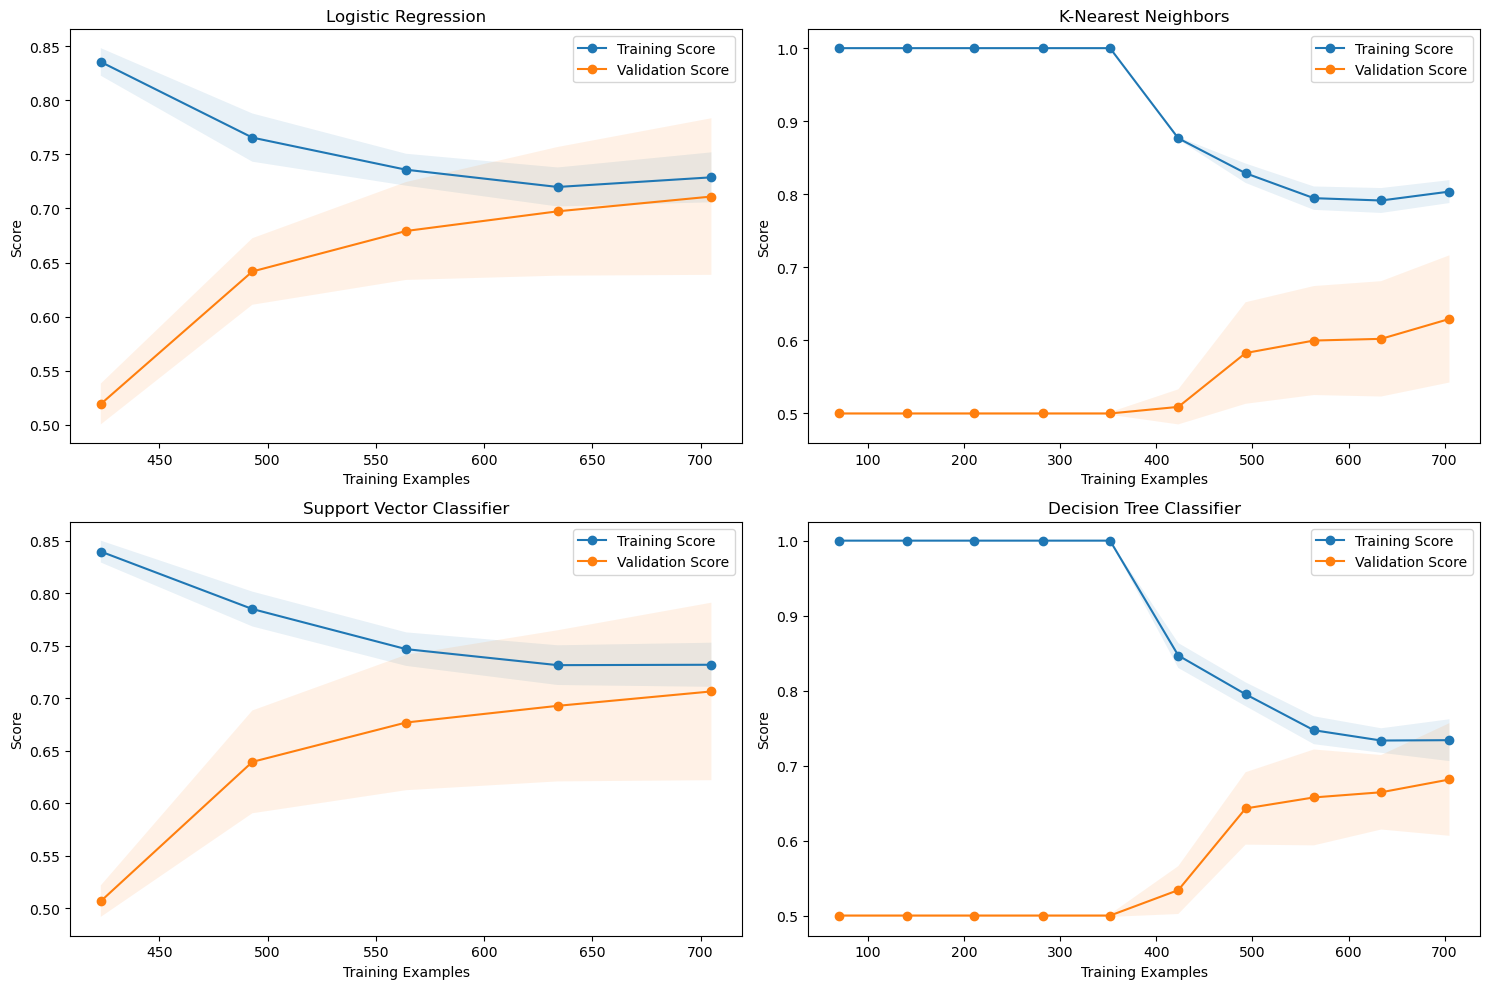

In [114]:
from sklearn.model_selection import learning_curve

# Define the classifiers
classifiers = {
    'Logistic Regression': log_reg,
    'K-Nearest Neighbors': knears_neighbors,
    'Support Vector Classifier': svc,
    'Decision Tree Classifier': tree_clf
}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, (name, clf) in enumerate(classifiers.items()):
    # Compute the learning curve
    train_sizes, train_scores, test_scores = learning_curve(clf, X_nearmiss, y_nearmiss, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate the mean and standard deviation of training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    axs[i].plot(train_sizes, train_scores_mean, label='Training Score', marker='o')
    axs[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
    axs[i].plot(train_sizes, test_scores_mean, label='Validation Score', marker='o')
    axs[i].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

    # Set the plot labels and title
    axs[i].set_title(name)
    axs[i].set_xlabel('Training Examples')
    axs[i].set_ylabel('Score')
    axs[i].legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


In [115]:
# Create an empty DataFrame
roc_df_nearmiss = pd.DataFrame(columns=['Classifier', 'ROC AUC'])

# Perform cross-validation predictions using NearMiss
log_reg_pred = cross_val_predict(log_reg, X_nearmiss, y_nearmiss, cv=5, method="decision_function")
knears_pred = cross_val_predict(knears_neighbors, X_nearmiss, y_nearmiss, cv=5)
svc_pred = cross_val_predict(svc, X_nearmiss, y_nearmiss, cv=5, method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_nearmiss, y_nearmiss, cv=5)

# Calculate and append ROC AUC scores to the DataFrame
roc_df_nearmiss = roc_df_nearmiss.append({'Classifier': 'Logistic Regression', 'ROC AUC': roc_auc_score(y_nearmiss, log_reg_pred)}, ignore_index=True)
roc_df_nearmiss = roc_df_nearmiss.append({'Classifier': 'K-Nearest Neighbors', 'ROC AUC': roc_auc_score(y_nearmiss, knears_pred)}, ignore_index=True)
roc_df_nearmiss = roc_df_nearmiss.append({'Classifier': 'Support Vector Classifier', 'ROC AUC': roc_auc_score(y_nearmiss, svc_pred)}, ignore_index=True)
roc_df_nearmiss = roc_df_nearmiss.append({'Classifier': 'Decision Tree Classifier', 'ROC AUC': roc_auc_score(y_nearmiss, tree_pred)}, ignore_index=True)

# Print the DataFrame
roc_df_nearmiss

Classifier   ROC AUC
0        Logistic Regression  0.746093
1        K-Nearest Neighbors  0.630385
2  Support Vector Classifier  0.745471
3   Decision Tree Classifier  0.681406

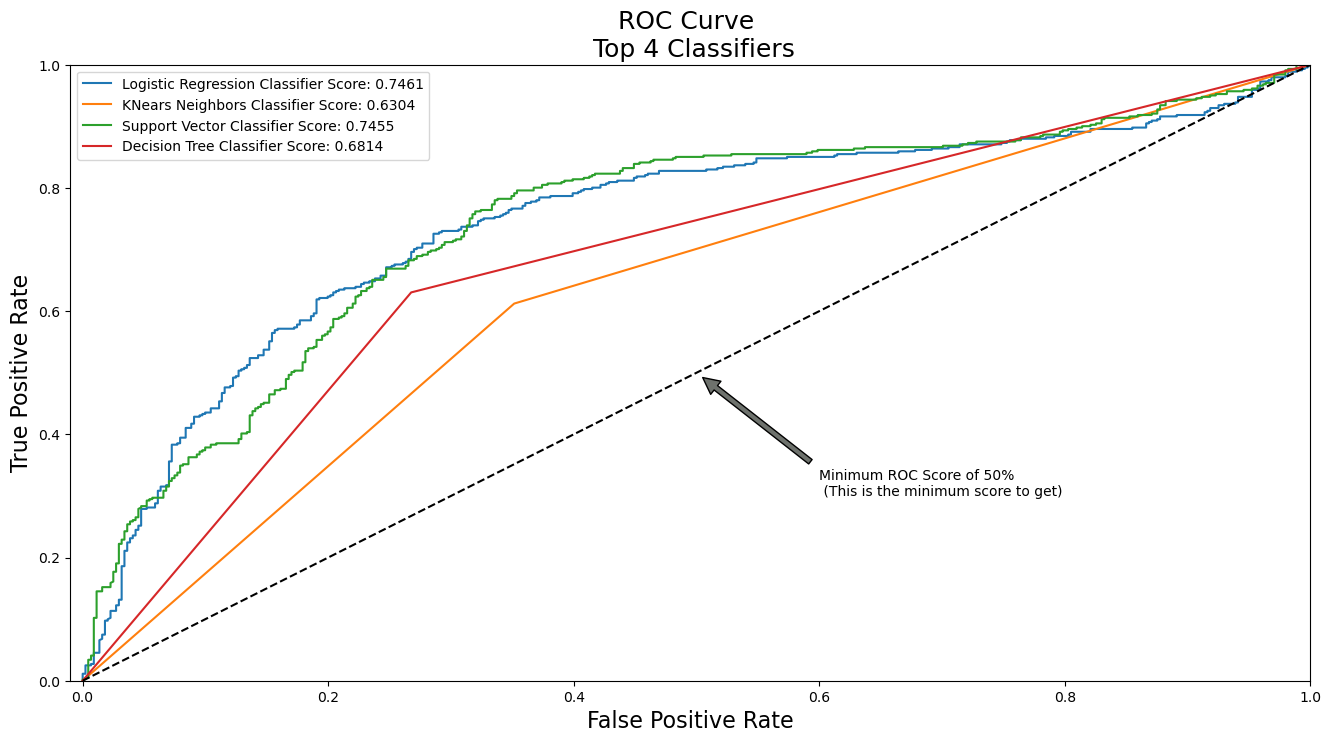

In [116]:
# Calculate ROC curves and scores
log_fpr, log_tpr, log_threshold = roc_curve(y_nearmiss, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_nearmiss, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_nearmiss, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_nearmiss, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_nearmiss, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_nearmiss, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_nearmiss, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_nearmiss, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

# Display the ROC curve
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()


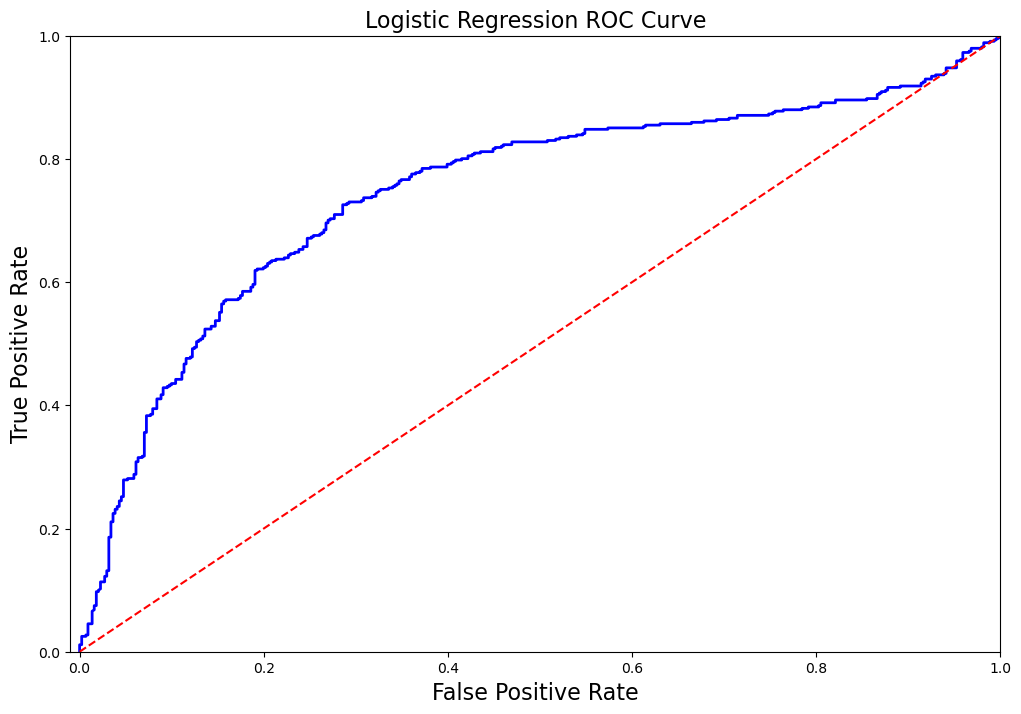

In [117]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate evaluation metrics for the undersampling technique
undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []

for train, test in sss.split(undersample_X, undersample_y):
    undersample_pipeline = imbalanced_make_pipeline(nearmiss, log_reg)
    undersample_model = undersample_pipeline.fit(undersample_X[train], undersample_y[train])
    undersample_prediction = undersample_model.predict(undersample_X[test])
    
    undersample_accuracy.append(accuracy_score(undersample_y[test], undersample_prediction))
    undersample_precision.append(precision_score(undersample_y[test], undersample_prediction))
    undersample_recall.append(recall_score(undersample_y[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_y[test], undersample_prediction))

# Calculate evaluation metrics for overfitting (without undersampling)
y_pred = log_reg.predict(X_train)
overfitting_recall = recall_score(y_train, y_pred)
overfitting_precision = precision_score(y_train, y_pred)
overfitting_f1 = f1_score(y_train, y_pred)
overfitting_accuracy = accuracy_score(y_train, y_pred)

# Create a DataFrame for the results
temp_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Undersampling Technique': [np.mean(undersample_accuracy), np.mean(undersample_precision),
                                 np.mean(undersample_recall), np.mean(undersample_f1)],
    'Overfitting (without Undersampling)': [overfitting_accuracy, overfitting_precision,
                                             overfitting_recall, overfitting_f1]
})

# Print the DataFrame
temp_df


Metric  Undersampling Technique  Overfitting (without Undersampling)
0   Accuracy                 0.699647                             0.773012
1  Precision                 0.718536                             0.163917
2     Recall                 0.657916                             0.698413
3   F1 Score                 0.684931                             0.265517

In [119]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [120]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.24


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.24')

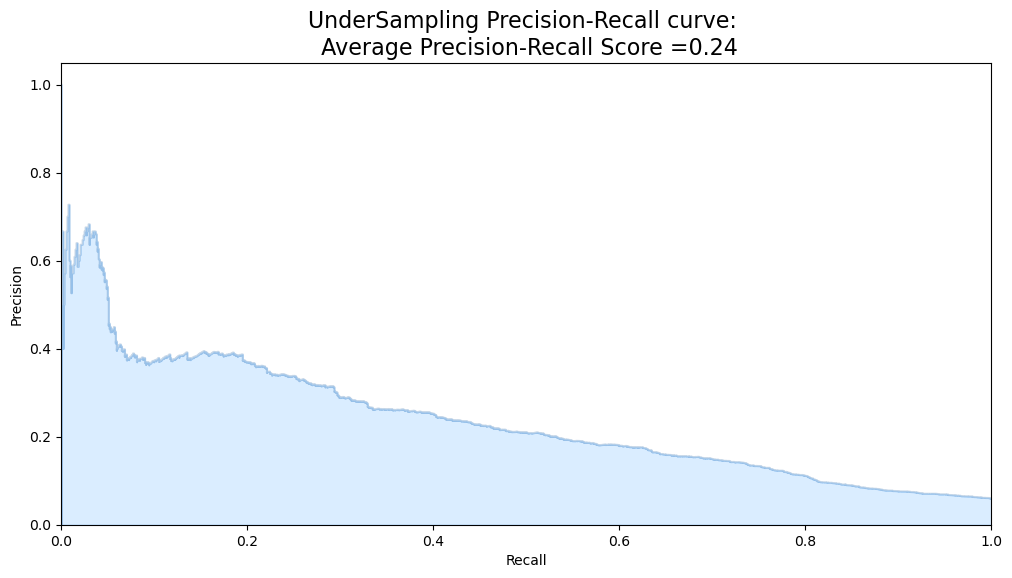

In [121]:
from sklearn.metrics import precision_recall_curve

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

## SMOTE

In [122]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 7507 | Length of y (train): 7507
Length of X (test): 15563 | Length of y (test): 15563
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.7690072574785918
precision: 0.16506472328071248
recall: 0.6736976506639427
f1: 0.26221441448459554
---------------------------------------------------------------------------------------------------------------------------------------


In [123]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.97      0.82      0.89     14640
       Fraud       0.17      0.59      0.27       923

    accuracy                           0.81     15563
   macro avg       0.57      0.70      0.58     15563
weighted avg       0.92      0.81      0.85     15563



In [124]:
y_score = best_est.decision_function(original_Xtest)

In [125]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.23


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.23')

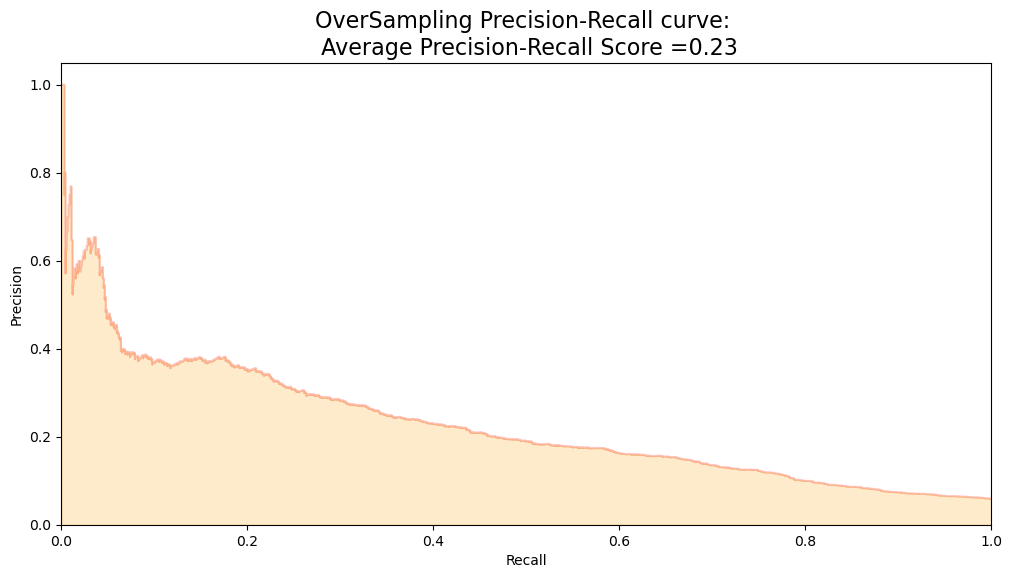

In [126]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [127]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [128]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.04069018363952637 sec


In [129]:
from sklearn import metrics
#Function for Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


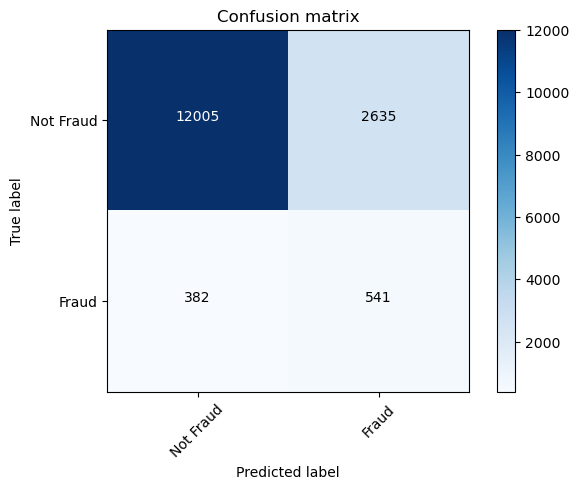

In [130]:
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(cm, classes=['Not Fraud','Fraud'])

Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


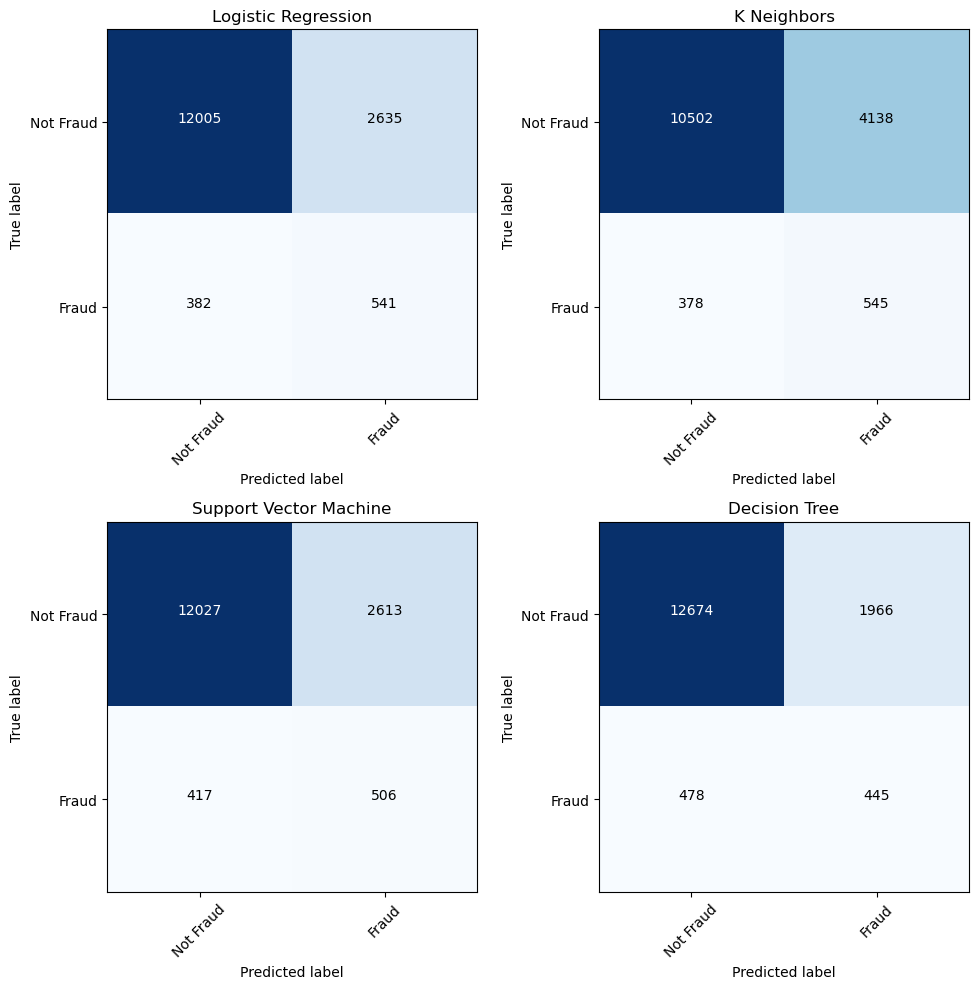

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# Function for Confusion matrix
def plot_confusion_matrix(ax, cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    ax.set_aspect("equal")  # Set aspect ratio to "equal" for square cells
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks, classes, rotation=45)
    ax.set_yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')


# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)
log_reg_cf = metrics.confusion_matrix(y_test, y_pred_log_reg)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
kneighbors_cf = metrics.confusion_matrix(y_test, y_pred_knear)

y_pred_svc = svc.predict(X_test)
svc_cf = metrics.confusion_matrix(y_test, y_pred_svc)

y_pred_tree = tree_clf.predict(X_test)
tree_cf = metrics.confusion_matrix(y_test, y_pred_tree)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot confusion matrices
plot_confusion_matrix(axes[0, 0], log_reg_cf, classes=['Not Fraud', 'Fraud'], title='Logistic Regression')
plot_confusion_matrix(axes[0, 1], kneighbors_cf, classes=['Not Fraud', 'Fraud'], title='K Neighbors')
plot_confusion_matrix(axes[1, 0], svc_cf, classes=['Not Fraud', 'Fraud'], title='Support Vector Machine')
plot_confusion_matrix(axes[1, 1], tree_cf, classes=['Not Fraud', 'Fraud'], title='Decision Tree')

plt.tight_layout()
plt.show()


In [132]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     14640
           1       0.17      0.59      0.26       923

    accuracy                           0.81     15563
   macro avg       0.57      0.70      0.58     15563
weighted avg       0.92      0.81      0.85     15563

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     14640
           1       0.12      0.59      0.19       923

    accuracy                           0.71     15563
   macro avg       0.54      0.65      0.51     15563
weighted avg       0.91      0.71      0.79     15563

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     14640
           1       0.16      0.55      0.25       923

    accuracy                           0.81     15563
   macro avg       0.56      0.68      0.57     15563
weighted

In [133]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

Technique     Score
0  Random UnderSampling  0.806143
1  Oversampling (SMOTE)  0.807492

# Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE):

## Summary (Keras || Random UnderSampling):


In [138]:
%pip install keras
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 422.5/422.5 kB 4.4 MB/s eta 0:00:00
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.3/1.3 MB 27.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing buil

In [139]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [140]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 528
Trainable params: 528
Non-trainable params: 0
_________________________________________________________________


In [141]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [142]:
undersample_X_train, undersample_y_train = rus.fit_resample(X_train, y_train)
undersample_model.fit(undersample_X_train, undersample_y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
29/29 - 4s - loss: 0.7063 - accuracy: 0.5489 - val_loss: 0.7355 - val_accuracy: 0.4633 - 4s/epoch - 127ms/step
Epoch 2/20
29/29 - 0s - loss: 0.6441 - accuracy: 0.6823 - val_loss: 0.7978 - val_accuracy: 0.4407 - 273ms/epoch - 9ms/step
Epoch 3/20
29/29 - 0s - loss: 0.6088 - accuracy: 0.7220 - val_loss: 0.7631 - val_accuracy: 0.5593 - 229ms/epoch - 8ms/step
Epoch 4/20
29/29 - 0s - loss: 0.5872 - accuracy: 0.7348 - val_loss: 0.7950 - val_accuracy: 0.5593 - 193ms/epoch - 7ms/step
Epoch 5/20
29/29 - 0s - loss: 0.5705 - accuracy: 0.7404 - val_loss: 0.8366 - val_accuracy: 0.5198 - 216ms/epoch - 7ms/step
Epoch 6/20
29/29 - 0s - loss: 0.5590 - accuracy: 0.7447 - val_loss: 0.8480 - val_accuracy: 0.5311 - 205ms/epoch - 7ms/step
Epoch 7/20
29/29 - 0s - loss: 0.5518 - accuracy: 0.7461 - val_loss: 0.8226 - val_accuracy: 0.5593 - 181ms/epoch - 6ms/step
Epoch 8/20
29/29 - 0s - loss: 0.5477 - accuracy: 0.7504 - val_loss: 0.9276 - val_accuracy: 0.5085 - 245ms/epoch - 8ms/step
Epoch 9/20
29/29 

In [143]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [144]:
undersample_fraud_probabilities = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = np.argmax(undersample_fraud_probabilities, axis=1)

In [145]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12839  1801]
 [  459   464]]
Confusion matrix, without normalization
[[14640     0]
 [    0   923]]


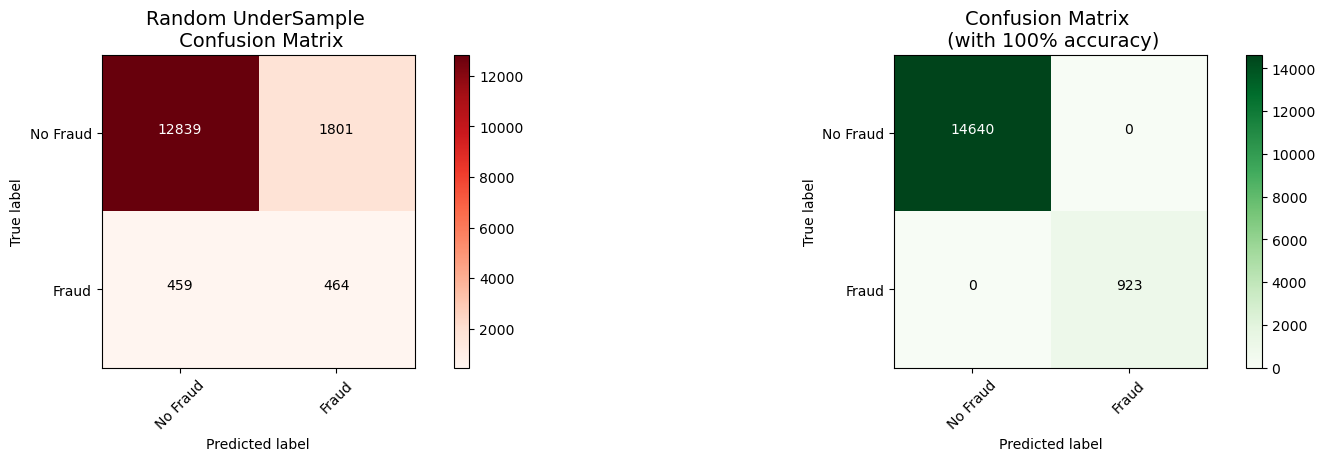

In [146]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

Comparing the results with the oversampling scenario, the undersampling approach seems to have higher false positive and false negative rates, indicating a less accurate prediction of fraud cases. Further analysis and refinement of the model may be necessary to improve its performance.

## Keras || OverSampling (SMOTE):

In [147]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [148]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [149]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
38/38 - 2s - loss: 0.6825 - accuracy: 0.5875 - val_loss: 0.8177 - val_accuracy: 0.3212 - 2s/epoch - 55ms/step
Epoch 2/20
38/38 - 0s - loss: 0.6107 - accuracy: 0.6706 - val_loss: 0.8350 - val_accuracy: 0.4178 - 312ms/epoch - 8ms/step
Epoch 3/20
38/38 - 0s - loss: 0.5698 - accuracy: 0.7169 - val_loss: 0.7882 - val_accuracy: 0.5019 - 277ms/epoch - 7ms/step
Epoch 4/20
38/38 - 0s - loss: 0.5417 - accuracy: 0.7309 - val_loss: 0.7689 - val_accuracy: 0.5150 - 276ms/epoch - 7ms/step
Epoch 5/20
38/38 - 0s - loss: 0.5293 - accuracy: 0.7390 - val_loss: 0.7757 - val_accuracy: 0.5235 - 347ms/epoch - 9ms/step
Epoch 6/20
38/38 - 0s - loss: 0.5203 - accuracy: 0.7459 - val_loss: 0.7618 - val_accuracy: 0.5377 - 294ms/epoch - 8ms/step
Epoch 7/20
38/38 - 0s - loss: 0.5122 - accuracy: 0.7508 - val_loss: 0.6974 - val_accuracy: 0.5808 - 238ms/epoch - 6ms/step
Epoch 8/20
38/38 - 0s - loss: 0.5058 - accuracy: 0.7530 - val_loss: 0.7603 - val_accuracy: 0.5455 - 347ms/epoch - 9ms/step
Epoch 9/20
38/38 -

In [150]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_probabilities = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions = np.argmax(oversample_fraud_probabilities, axis=1)

Confusion matrix, without normalization
[[13286  1354]
 [  482   441]]
Confusion matrix, without normalization
[[14640     0]
 [    0   923]]


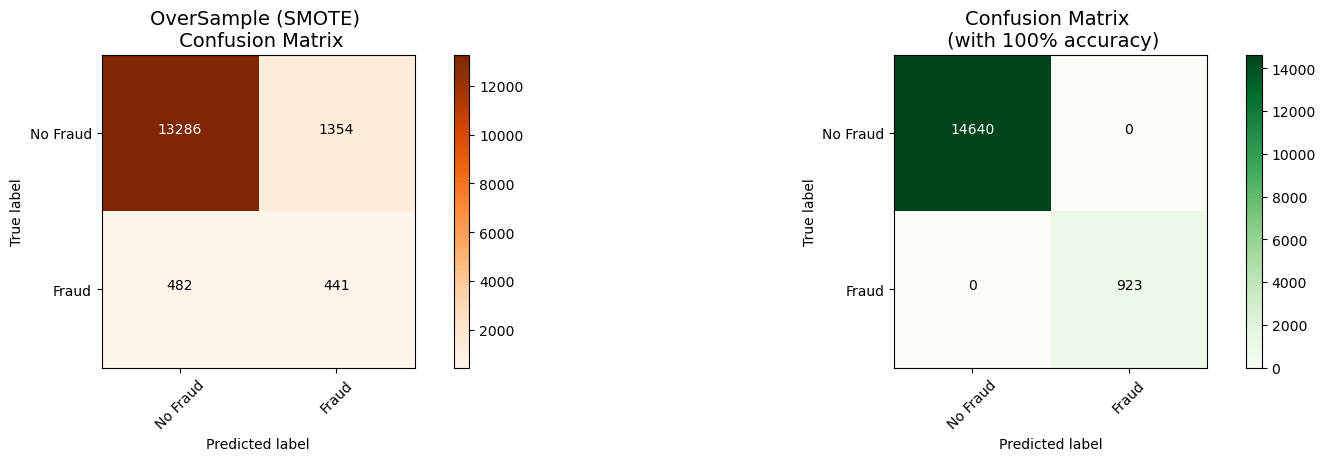

In [151]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

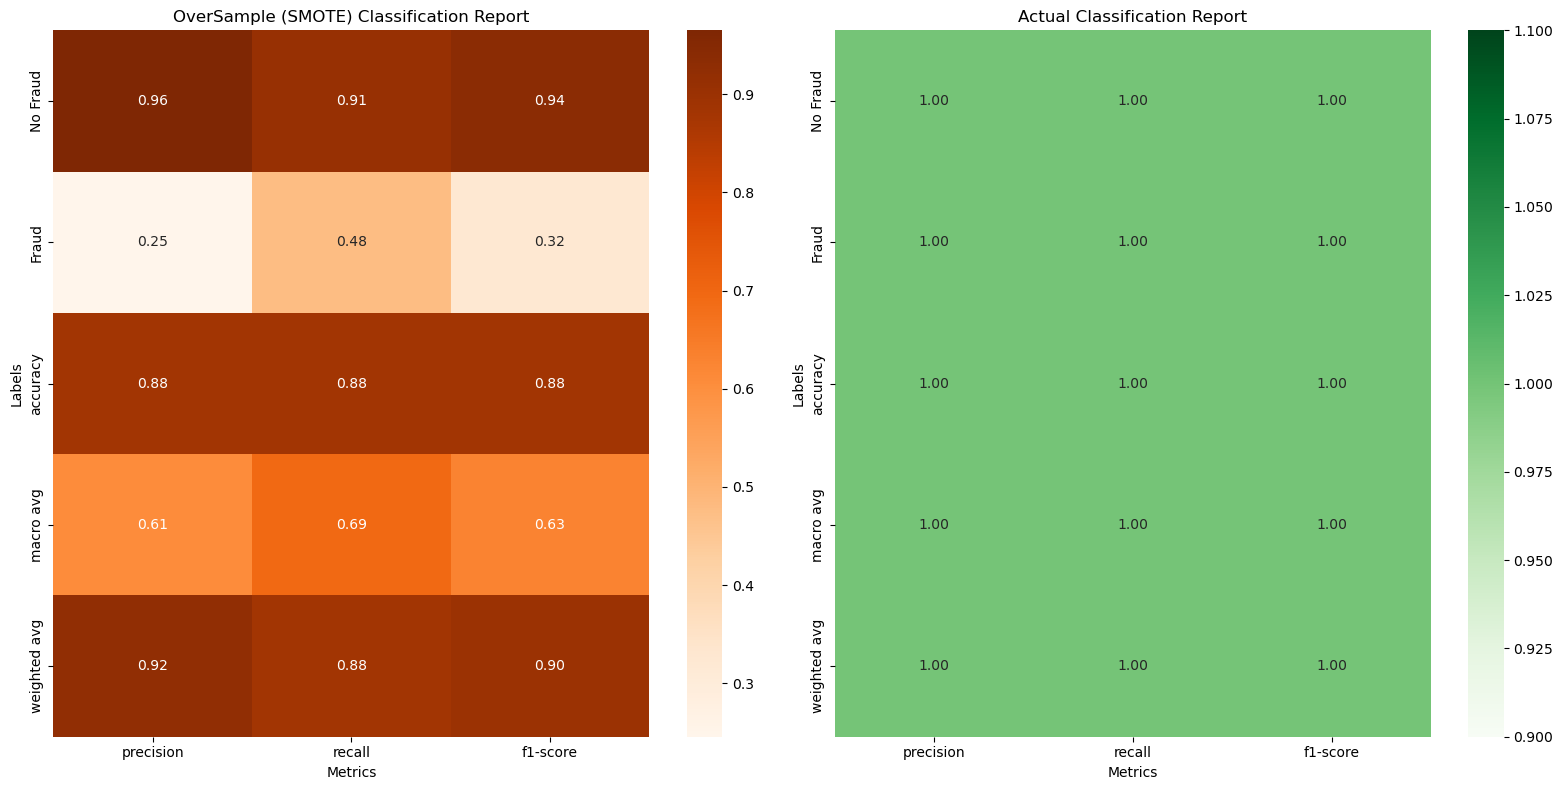

In [152]:
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Compute the classification report for oversample_smote
oversample_report = classification_report(original_ytest, oversample_fraud_predictions, target_names=labels, output_dict=True)

# Compute the classification report for actual_cm
actual_report = classification_report(original_ytest, original_ytest, target_names=labels, output_dict=True)

# Function to convert classification report dictionary to DataFrame
def classification_report_to_dataframe(report):
    df = pd.DataFrame(report).transpose()
    df.drop('support', axis=1, inplace=True)
    df['Label'] = df.index
    df = df[['Label', 'precision', 'recall', 'f1-score']]
    return df

# Plot the classification reports
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sns.heatmap(classification_report_to_dataframe(oversample_report).set_index('Label').astype(float), annot=True, cmap='Oranges', fmt='.2f', ax=axs[0])
axs[0].set_title('OverSample (SMOTE) Classification Report')
axs[0].set_xlabel('Metrics')
axs[0].set_ylabel('Labels')

sns.heatmap(classification_report_to_dataframe(actual_report).set_index('Label').astype(float), annot=True, cmap='Greens', fmt='.2f', ax=axs[1])
axs[1].set_title('Actual Classification Report')
axs[1].set_xlabel('Metrics')
axs[1].set_ylabel('Labels')

plt.tight_layout()
plt.show()


Matthews Correlation Coefficient (MCC)

In [153]:
from sklearn.metrics import matthews_corrcoef

# Calculate MCC for oversampling (SMOTE) results
mcc_oversample = matthews_corrcoef(original_ytest, oversample_fraud_predictions)

# Calculate MCC for random undersampling results
mcc_undersample = matthews_corrcoef(original_ytest, undersample_fraud_predictions)

# Print the MCC values
print("MCC for Oversampling (SMOTE): {:.4f}".format(mcc_oversample))
print("MCC for Random Undersampling: {:.4f}".format(mcc_undersample))


MCC for Oversampling (SMOTE): 0.2849
MCC for Random Undersampling: 0.2543


# Score User

Logistic Regression with Under-Sampling:

In [154]:
# Logistic Regression with Under-Sampling
beta_coeffs_undersample = log_reg.coef_
data_undersample = {'Feature': X.columns, 'Beta Coefficient (Under-Sampling)': beta_coeffs_undersample[0]}
df_undersample = pd.DataFrame(data_undersample)

In [155]:
print("Beta Coefficients (Logistic Regression with Under-Sampling):")
df_undersample

Beta Coefficients (Logistic Regression with Under-Sampling):


Feature  Beta Coefficient (Under-Sampling)
0           total_app_label                           0.177566
1           economic_region                           0.079760
2  trigger_outside_rate_bin                          -0.581776
3             male_rate_bin                           0.300330
4           rate_above3_bin                           0.197886
5      min_customer_age_bin                          -0.057234
6         rate_below600_bin                           0.221653
7      disbursed_amount_bin                           0.036289
8        revenue_amount_bin                           0.282862
9           female_rate_bin                          -0.161736

In [173]:
intercept  = log_reg.intercept_[0]
intercept

-1.697277797963148

Logistic Regression with SMOTE Technique:

In [157]:
# Logistic Regression with SMOTE Technique
alpha = best_est.intercept_[0]
beta_coeffs_oversample = best_est.coef_
data_oversample = {'Feature': X.columns, 'Beta Coefficient (SMOTE)': beta_coeffs_oversample[0]}
df_oversample = pd.DataFrame(data_oversample)

In [158]:
# Print the DataFrames
print("Beta Coefficients (Logistic Regression with SMOTE Technique):")
df_oversample

Beta Coefficients (Logistic Regression with SMOTE Technique):


Feature  Beta Coefficient (SMOTE)
0           total_app_label                  0.183921
1           economic_region                  0.073985
2  trigger_outside_rate_bin                 -0.631780
3             male_rate_bin                  0.298338
4           rate_above3_bin                  0.177789
5      min_customer_age_bin                 -0.107653
6         rate_below600_bin                  0.206441
7      disbursed_amount_bin                  0.017051
8        revenue_amount_bin                  0.329725
9           female_rate_bin                 -0.181249

## Sub section

In [159]:
loan_data[selected_cols].head()

total_app_label trigger_outside_rate_bin       revenue_amount_bin  \
0          4b. =5             (0.043, 1.0]    (650000.0, 1500000.0]   
1          5.c =8                      NaN  (1500000.0, 84925000.0]   
2           1. =1                      NaN                      NaN   
3           3. =3                      NaN                      NaN   
4           3. =3                      NaN     (250000.0, 650000.0]   

         disbursed_amount_bin rate_below600_bin   male_rate_bin  \
0    (26000000.0, 60000000.0]    (0.667, 0.875]    (0.667, 1.0]   
1  (60000000.0, 3397000000.0]      (0.0, 0.333]  (0.167, 0.375]   
2                         NaN               NaN    (0.667, 1.0]   
3                         NaN      (0.875, 1.0]    (0.667, 1.0]   
4    (10000000.0, 26000000.0]      (0.5, 0.667]  (0.167, 0.375]   

  min_customer_age_bin rate_above3_bin           economic_region  \
0         (26.0, 29.0]             NaN  Southern Economic Region   
1         (29.0, 34.0]             NaN  Southern Economic Region   
2         (29.0, 34.0]    (0.258, 1.0]  Southern Economic Region   
3         (29.0, 34.0]             NaN  Southern Economic Region   
4         (29.0, 34.0]    (0.258, 1.0]  Southern Economic Region   

  female_rate_bin  
0             NaN  
1    (0.5, 0.625]  
2             NaN  
3             NaN  
4  (0.625, 0.833]

In [160]:
df = loan_data.copy()
df1 = df.copy()  # Create a copy of the original dataframe
label_encoders = {}  # Create a dictionary to store the LabelEncoder for each column

encoded_data = []

for column in selected_cols:
    label_encoder = LabelEncoder()
    encoded_values = label_encoder.fit_transform(df[column])
    df[column] = encoded_values
    df1[column] = encoded_values  # Also encode the values in df1
    label_encoders[column] = label_encoder  # Store the encoder
    for encoded_value, class_name in enumerate(label_encoder.classes_):
        encoded_data.append([encoded_value, class_name, column])

df = pd.concat([df[selected_cols], loan_data['BAD']], axis=1)

In [161]:
# Define your functions
def calculate_scorecard_points(woe_data, beta_coeffs, base_score, base_odds, pdo):
    factor = pdo / np.log(2)
    offset = base_score - factor * np.log(base_odds)
    for df_woe in woe_data:
        feature_name = df_woe.columns[0]
        if feature_name in beta_coeffs:
            df_woe['ScorecardPoints'] = round(factor * beta_coeffs[feature_name] * df_woe['WoE'])
    return woe_data, offset

# Calculate WoE data for selected columns
woe_data = []

for column in selected_cols:
    woe_data.append(woe_discrete(df, column))

# Create a dictionary to map feature names to their corresponding coefficients
feature_names = selected_cols
beta_coeffs_dict = {feature: coef for feature, coef in zip(feature_names, beta_coeffs_undersample.flatten())}

# Define the base score, base odds, and pdo
base_score = 600
base_odds = 50
pdo = 20

# Calculate the scorecard points
scorecard, offset = calculate_scorecard_points(woe_data, beta_coeffs_dict, base_score, base_odds, pdo)

# Add score for each individual
for df_woe in scorecard:
    feature_name = df_woe.columns[0]
    score_dict = df_woe.set_index(df_woe.columns[0])['ScorecardPoints'].to_dict()
    df[feature_name + '_score'] = df[feature_name].map(score_dict)

# Calculate total score
df['TotalScore'] = df[[col for col in df.columns if 'score' in col]].sum(axis=1) + offset


In [162]:
for df_woe in scorecard:
    print(f"Feature: {df_woe.columns[0]}")
    print(df_woe[[df_woe.columns[0], 'WoE', 'ScorecardPoints', 'IV']])
    print("-"*50)


Feature: total_app_label
    total_app_label       WoE  ScorecardPoints       IV
0                16 -2.494523            -13.0  0.86799
1                15 -2.103008            -11.0  0.86799
2                14 -1.694132             -9.0  0.86799
3                13 -1.329580             -7.0  0.86799
4                12 -1.214376             -6.0  0.86799
5                11 -1.047686             -5.0  0.86799
6                10 -0.775726             -4.0  0.86799
7                 9 -0.397764             -2.0  0.86799
8                 8  0.071380              0.0  0.86799
9                 7  0.099107              1.0  0.86799
10                6  0.216455              1.0  0.86799
11                5  0.626362              3.0  0.86799
12                4  0.710875              4.0  0.86799
13                3  0.727007              4.0  0.86799
14                2  0.883842              5.0  0.86799
15                0  0.915813              5.0  0.86799
16                1  1.

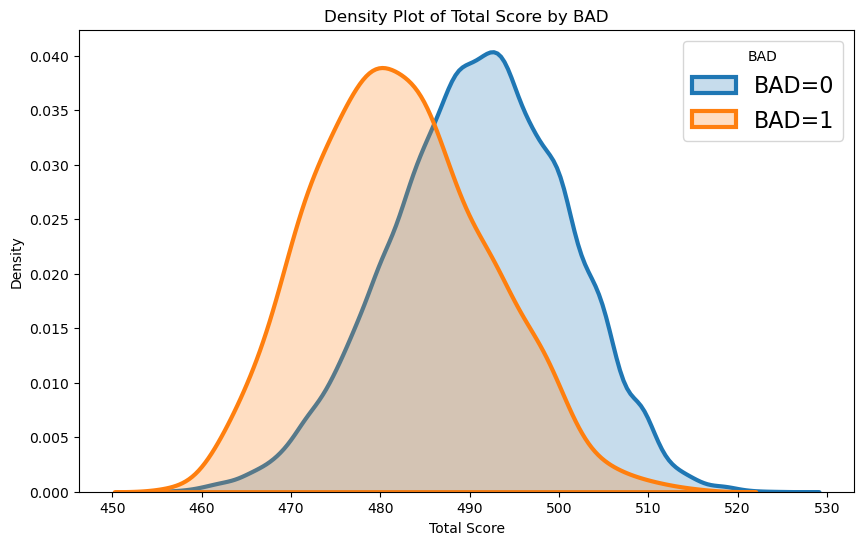

In [163]:
plt.figure(figsize=(10,6))

# Plot distribution of TotalScore for BAD = 0
sns.distplot(df[df['BAD'] == 0]['TotalScore'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label = "BAD=0")

# Plot distribution of TotalScore for BAD = 1
sns.distplot(df[df['BAD'] == 1]['TotalScore'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label = "BAD=1")

plt.legend(prop={'size': 16}, title = 'BAD')
plt.title('Density Plot of Total Score by BAD')
plt.xlabel('Total Score')
plt.ylabel('Density')
plt.show()

In [164]:
scorecard_decoded = []

for df_woe in scorecard:
    feature_name = df_woe.columns[0]
    decoded_feature_name = label_encoders[feature_name].inverse_transform(df_woe[feature_name])
    df_woe_decoded = df_woe.copy()
    df_woe_decoded[feature_name] = decoded_feature_name
    scorecard_decoded.append(df_woe_decoded)

# Now print the scorecards with decoded feature names
for df_woe in scorecard_decoded:
    print(f"Feature: {df_woe.columns[0]}")
    print(df_woe[[df_woe.columns[0], 'WoE', 'ScorecardPoints', 'IV']])
    print("-"*50)


Feature: total_app_label
   total_app_label       WoE  ScorecardPoints       IV
0          9g. >80 -2.494523            -13.0  0.86799
1        9e. 51-80 -2.103008            -11.0  0.86799
2        9d. 41-50 -1.694132             -9.0  0.86799
3        9c. 31-40 -1.329580             -7.0  0.86799
4        9b. 26-30 -1.214376             -6.0  0.86799
5        9a. 21-25 -1.047686             -5.0  0.86799
6         8. 16-20 -0.775726             -4.0  0.86799
7         7. 11-15 -0.397764             -2.0  0.86799
8          6. 9-10  0.071380              0.0  0.86799
9           5.c =8  0.099107              1.0  0.86799
10          5.b =7  0.216455              1.0  0.86799
11          5.a =6  0.626362              3.0  0.86799
12          4b. =5  0.710875              4.0  0.86799
13          4a. =4  0.727007              4.0  0.86799
14           3. =3  0.883842              5.0  0.86799
15           1. =1  0.915813              5.0  0.86799
16           2. =2  1.084913            

In [165]:
# Add loan scores as a new column to the original DataFrame
loan_data['LoanScore'] = df['TotalScore']

In [166]:
loan_data.head()

MONTH vnpostUserName      vnpostProvinceName  total_app  \
0  2022-11-01       00099806  Bưu điện Tỉnh Bạc Liêu          5   
1  2022-12-01       00099806  Bưu điện Tỉnh Bạc Liêu          8   
2  2023-01-01       00099806  Bưu điện Tỉnh Bạc Liêu          1   
3  2023-02-01       00099806  Bưu điện Tỉnh Bạc Liêu          3   
4  2023-03-01       00099806  Bưu điện Tỉnh Bạc Liêu          3   

  total_app_label  average_customer_age  min_customer_age  max_customer_age  \
0          4b. =5             34.600000                29                43   
1          5.c =8             40.125000                30                58   
2           1. =1             33.000000                33                33   
3           3. =3             34.333333                33                36   
4           3. =3             35.333333                31                42   

   disbursed_amount  revenue_amount  personal_id_rate  phoneNumber_rate  \
0          50000000       1250000.0             1.000             1.000   
1         110000000       2750000.0             0.875             0.875   
2                 0             0.0             1.000             1.000   
3                 0             0.0             1.000             1.000   
4          20000000        500000.0             1.000             1.000   

   email_rate  male_rate  female_rate  approved_rate  denied_rate  \
0       1.000   1.000000     0.000000       0.200000     0.800000   
1       0.875   0.375000     0.625000       0.375000     0.500000   
2       1.000   1.000000     0.000000       0.000000     1.000000   
3       1.000   1.000000     0.000000       0.000000     1.000000   
4       1.000   0.333333     0.666667       0.333333     0.666667   

   canceled_rate  device_create_rate  device_token_submit_rate  \
0          0.000            0.200000                  0.200000   
1          0.125            0.125000                  0.125000   
2          0.000            1.000000                  1.000000   
3          0.000            0.333333                  0.333333   
4          0.000            0.333333                  0.333333   

   change_device_rate  stable_and_self_employed_rate  \
0                 0.0                       1.000000   
1                 0.0                       1.000000   
2                 0.0                       1.000000   
3                 0.0                       0.666667   
4                 0.0                       0.000000   

   socialSecurityNumber_rate  cus_single_rate  cus_city_rate  \
0                        0.0         0.200000       0.400000   
1                        0.0         0.250000       0.125000   
2                        0.0         0.000000       1.000000   
3                        0.0         0.666667       0.333333   
4                        0.0         1.000000       0.333333   

   cus_districts_rate  cus_partner_rate  sum_mass_rate  sum_medium_rate  \
0            0.800000               1.0            0.0            0.600   
1            0.375000               1.0            0.0            0.625   
2            1.000000               1.0            0.0            0.000   
3            0.666667               1.0            0.0            1.000   
4            0.666667               1.0            0.0            1.000   

   sum_low_rate  sum_mass_disburse_rate  sum_medium_disburse_rate  \
0          0.40                     0.0                  0.000000   
1          0.25                     0.0                  0.125000   
2          1.00                     0.0                  0.000000   
3          0.00                     0.0                  0.000000   
4          0.00                     0.0                  0.333333   

   sum_low_disburse_rate  cash_rate  trigger_outside_rate  \
0                   0.20       1.00                   0.2   
1                   0.25       0.75                   0.0   
2                   0.00       1.00                   0.0   
3                   0.00       1.00

In [176]:
# # Convert DataFrame to Excel
# excel_file = r'C:\Users\Datarist\OneDrive - VietNam National University - HCM INTERNATIONAL UNIVERSITY\2. Scoring User By Month(10 biến)\loan_data.xlsx'
# loan_data.to_excel(excel_file, index=False)  # Save DataFrame to Excel file without index

# print(f"Loan data saved to {excel_file}")

Loan data saved to C:\Users\Datarist\OneDrive - VietNam National University - HCM INTERNATIONAL UNIVERSITY\2. Scoring User By Month(10 biến)\loan_data.xlsx


# ANN

Fraud detection methods based on neural networks have gained popularity due to their ability to mimic the functions of the brain, particularly in pattern recognition and associative memory. Neural networks can recognize similar patterns, make predictions based on learned associations, and are commonly used for classification and clustering tasks. 

One of the key advantages of neural networks is their ability to learn from past data, leading to improved results over time. They can extract rules and predict future activities based on the current situation. Banks can leverage neural networks to detect fraudulent card usage more efficiently and effectively.

In credit card fraud studies, neural networks have been widely employed. Neural networks are non-linear statistical data modeling tools that can capture complex relationships between inputs and outputs, as well as identify patterns in data.

The training and recognition phases of a neural network involve learning and model creation. There are two types of training methods: supervised and unsupervised. In supervised training, both fraudulent and non-fraudulent records are used to create models. On the other hand, unsupervised training focuses on identifying transactions that deviate the most from the norm without prior knowledge of fraud patterns in the database.

Neural networks are particularly effective when applied to large transaction datasets, and they require a substantial amount of training data to achieve optimal performance.

In [168]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Get the number of input features
input_dim = X.shape[1]

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu', input_dim=input_dim))

# Adding the second hidden layer
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X, y, batch_size=32, epochs=20)


Epoch 1/20
721/721 [==============================] - 2s 1ms/step - loss: 0.2753 - accuracy: 0.9407
Epoch 2/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1953 - accuracy: 0.9409
Epoch 3/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1907 - accuracy: 0.9409
Epoch 4/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1889 - accuracy: 0.9409
Epoch 5/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1874 - accuracy: 0.9409
Epoch 6/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1861 - accuracy: 0.9409
Epoch 7/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1853 - accuracy: 0.9409
Epoch 8/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1844 - accuracy: 0.9409
Epoch 9/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1839 - accuracy: 0.9409
Epoch 10/20
721/721 [==============================] - 1s 2ms/step - loss: 0.1835 - accuracy: 0.9409

In [169]:
# Predicting the Test set results
y_pred = classifier.predict(original_Xtest)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(original_Xtest, original_ytest)
score

487/487 [==============================] - 1s 2ms/step - loss: 0.1797 - accuracy: 0.9406


[0.1797143965959549, 0.9405641555786133]

Confusion matrix, without normalization
[[14621    19]
 [  906    17]]


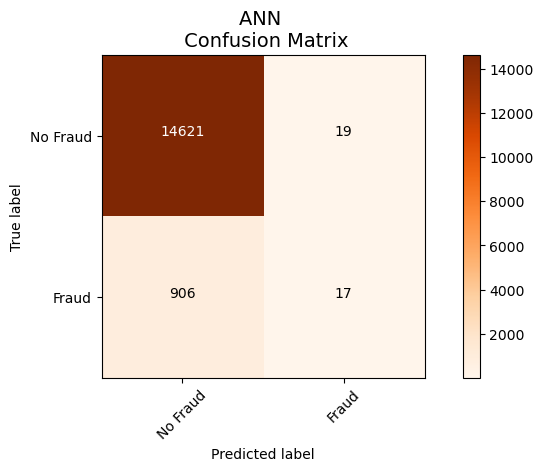

In [170]:
ann_cm = confusion_matrix(original_ytest, y_pred)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(ann_cm, labels, title="ANN \n Confusion Matrix", cmap=plt.cm.Oranges)


487/487 [==============================] - 1s 1ms/step


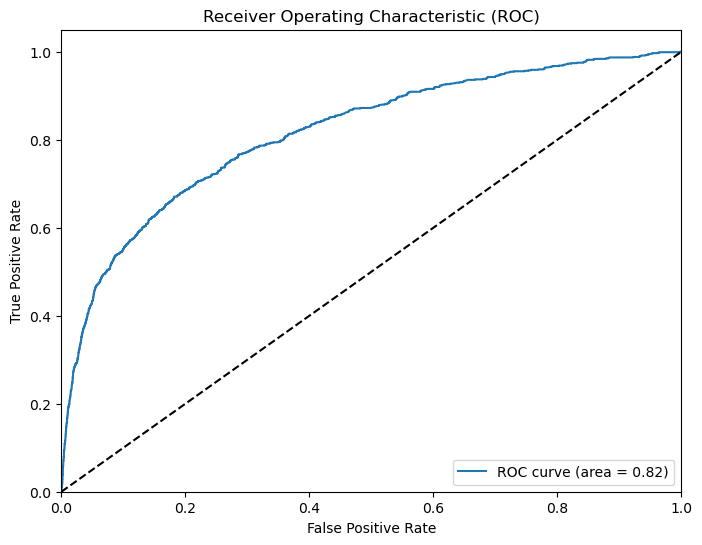

In [171]:
# Calculate the predicted probabilities
y_pred_prob = classifier.predict(original_Xtest)

# Extract the probabilities for the positive class
y_pred_prob_positive = y_pred_prob[:, 0]

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(original_ytest, y_pred_prob_positive)
roc_auc = roc_auc_score(original_ytest, y_pred_prob_positive)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

The model has a good ability to distinguish between the positive and negative classes. The ROC score ranges from 0 to 1, with a higher value indicating better performance. In this case, an ROC of 0.82 suggests that the model has a relatively high true positive rate and a low false positive rate, meaning it is performing well in identifying the positive class. However, the interpretation of the ROC score can depend on the specific problem and domain, so it is important to consider other evaluation metrics and the context of the task at hand.

# Test Statistics

In [172]:
df = loan_data.copy()
# Split the data into "BAD" and "non-BAD" groups
bad_group = df[df['BAD'] == 1]
non_bad_group = df[df['BAD'] == 0]

# Select the trigger variables
trigger_variables = df.select_dtypes(include=['float64', 'int64']).columns

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Trigger Variable', 'T-statistic', 'P-value'])

# Perform t-tests for each trigger variable
for trigger_var in trigger_variables:
    trigger_bad = bad_group[trigger_var]
    trigger_non_bad = non_bad_group[trigger_var]

    # Perform the t-test
    t_stat, p_value = stats.ttest_ind(trigger_bad, trigger_non_bad)

    # Check if the p-value is significant (less than 0.05)
    if p_value < 0.05:
        results_df = results_df.append({'Trigger Variable': trigger_var,
                                        'T-statistic': t_stat,
                                        'P-value': p_value}, ignore_index=True)

# Display the significant results in a labeled dataframe
print(results_df)

                   Trigger Variable  T-statistic        P-value
0                         total_app    40.815989   0.000000e+00
1              average_customer_age    -4.937223   7.979601e-07
2                  min_customer_age   -18.085289   1.321728e-72
3                  max_customer_age    15.426342   2.013020e-53
4                  disbursed_amount    26.012685  4.692307e-147
5                    revenue_amount    26.012685  4.692307e-147
6                  personal_id_rate     8.417178   4.077983e-17
7                  phoneNumber_rate     8.300260   1.095185e-16
8                        email_rate     6.344498   2.272965e-10
9                         male_rate    11.642423   3.066978e-31
10                      female_rate   -11.642423   3.066978e-31
11                    approved_rate    -7.400577   1.402323e-13
12                      denied_rate    10.365363   4.046788e-25
13                    canceled_rate    -7.296334   3.052724e-13
14               device_create_rate   -1

Variables with negative t-statistics like 'average_customer_age', 'min_customer_age', 'female_rate', 'approved_rate', 'canceled_rate', 'device_create_rate', 'device_token_submit_rate', 'sum_medium_rate', 'sum_mass_disburse_rate' show that the mean of these variables is lower in one class of 'BAD' than the other. This doesn't affect the importance of the variable, just the direction of the relationship.